In [1]:
import pandas as pd 
#df = pd.read_csv("C:/Users/alfredo/Documents/GitHub/RNP/data.csv")
df = pd.read_csv("C:/Users/alfre/Documents/GitHub/RNP/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = df.drop(['id'], axis=1)

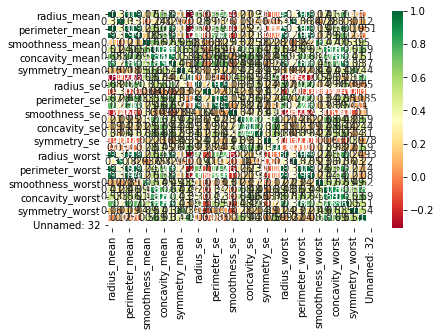

In [3]:
import seaborn as sns
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

In [4]:
cols = ['radius_worst',
       'texture_worst',
       'perimeter_worst',
       'area_worst',
       'smoothness_worst',
       'compactness_worst',
       'concavity_worst',
       'concave points_worst',
       'symmetry_worst',
       'fractal_dimension_worst',
       'perimeter_mean',
       'perimeter_se',
       'area_mean',
       'area_se',
       'concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']

df = df.drop(cols, axis=1)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_df = df
X_df = X_df.drop(['Unnamed: 32','diagnosis'], axis=1)
y_df = df['diagnosis']
y_df = [0 if x == 'B' else 1 for x in y_df]

In [6]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [398,1])
y_ts = np.reshape(y_ts, [171,1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(171, 12)
(398, 12)
(171, 1)
(398, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (398, 12)
Testing Data : (171, 12)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20000
13/13 [==============================] - 0s 12ms/step - loss: 0.7358 - accuracy: 0.3568 - val_loss: 0.7229 - val_accuracy: 0.2865
Epoch 2/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.3342 - val_loss: 0.7113 - val_accuracy: 0.2807
Epoch 3/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.2789 - val_loss: 0.7024 - val_accuracy: 0.4795
Epoch 4/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.7022 - accura

Epoch 54/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6256 - val_loss: 0.6606 - val_accuracy: 0.6316
Epoch 55/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6256 - val_loss: 0.6603 - val_accuracy: 0.6316
Epoch 56/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6256 - val_loss: 0.6601 - val_accuracy: 0.6316
Epoch 57/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6256 - val_loss: 0.6598 - val_accuracy: 0.6316
Epoch 58/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6256 - val_loss: 0.6596 - val_accuracy: 0.6316
Epoch 59/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6256 - val_loss: 0.6593 - val_accuracy: 0.6316
Epoch 60/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6256 - val_loss: 0.6591 - val_accuracy:

Epoch 111/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6256 - val_loss: 0.6462 - val_accuracy: 0.6316
Epoch 112/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6256 - val_loss: 0.6459 - val_accuracy: 0.6316
Epoch 113/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6256 - val_loss: 0.6457 - val_accuracy: 0.6316
Epoch 114/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6256 - val_loss: 0.6454 - val_accuracy: 0.6316
Epoch 115/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6256 - val_loss: 0.6451 - val_accuracy: 0.6316
Epoch 116/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6256 - val_loss: 0.6449 - val_accuracy: 0.6316
Epoch 117/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6256 - val_loss: 0.6446 - val_ac

13/13 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6256 - val_loss: 0.6316 - val_accuracy: 0.6316
Epoch 168/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6256 - val_loss: 0.6313 - val_accuracy: 0.6316
Epoch 169/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6256 - val_loss: 0.6310 - val_accuracy: 0.6316
Epoch 170/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6256 - val_loss: 0.6306 - val_accuracy: 0.6316
Epoch 171/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6256 - val_loss: 0.6303 - val_accuracy: 0.6316
Epoch 172/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6256 - val_loss: 0.6300 - val_accuracy: 0.6316
Epoch 173/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.6256 - val_loss: 0.6297 - val_accuracy: 0.6316
E

13/13 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6256 - val_loss: 0.6155 - val_accuracy: 0.6316
Epoch 224/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6256 - val_loss: 0.6152 - val_accuracy: 0.6316
Epoch 225/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.6256 - val_loss: 0.6149 - val_accuracy: 0.6316
Epoch 226/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6256 - val_loss: 0.6145 - val_accuracy: 0.6316
Epoch 227/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6256 - val_loss: 0.6142 - val_accuracy: 0.6316
Epoch 228/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.6256 - val_loss: 0.6139 - val_accuracy: 0.6316
Epoch 229/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6256 - val_loss: 0.6136 - val_accuracy: 0.6316
E

13/13 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6256 - val_loss: 0.5972 - val_accuracy: 0.6433
Epoch 280/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6256 - val_loss: 0.5969 - val_accuracy: 0.6491
Epoch 281/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6256 - val_loss: 0.5965 - val_accuracy: 0.6491
Epoch 282/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6256 - val_loss: 0.5962 - val_accuracy: 0.6491
Epoch 283/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6256 - val_loss: 0.5958 - val_accuracy: 0.6491
Epoch 284/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6256 - val_loss: 0.5954 - val_accuracy: 0.6491
Epoch 285/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6256 - val_loss: 0.5952 - val_accuracy: 0.6491
E

13/13 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6307 - val_loss: 0.5770 - val_accuracy: 0.6901
Epoch 336/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.6307 - val_loss: 0.5767 - val_accuracy: 0.6901
Epoch 337/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6307 - val_loss: 0.5764 - val_accuracy: 0.6901
Epoch 338/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6357 - val_loss: 0.5759 - val_accuracy: 0.6901
Epoch 339/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6307 - val_loss: 0.5755 - val_accuracy: 0.6901
Epoch 340/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6332 - val_loss: 0.5749 - val_accuracy: 0.6901
Epoch 341/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6307 - val_loss: 0.5747 - val_accuracy: 0.6901
E

13/13 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.6558 - val_loss: 0.5544 - val_accuracy: 0.7778
Epoch 392/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.6558 - val_loss: 0.5540 - val_accuracy: 0.7778
Epoch 393/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.6558 - val_loss: 0.5536 - val_accuracy: 0.7778
Epoch 394/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.6558 - val_loss: 0.5531 - val_accuracy: 0.7778
Epoch 395/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.6558 - val_loss: 0.5527 - val_accuracy: 0.7836
Epoch 396/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.6558 - val_loss: 0.5524 - val_accuracy: 0.7836
Epoch 397/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.6558 - val_loss: 0.5522 - val_accuracy: 0.7895
E

13/13 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.6834 - val_loss: 0.5304 - val_accuracy: 0.8421
Epoch 448/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.6809 - val_loss: 0.5302 - val_accuracy: 0.8421
Epoch 449/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.6859 - val_loss: 0.5299 - val_accuracy: 0.8421
Epoch 450/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.6884 - val_loss: 0.5296 - val_accuracy: 0.8421
Epoch 451/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.6884 - val_loss: 0.5290 - val_accuracy: 0.8421
Epoch 452/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.6884 - val_loss: 0.5288 - val_accuracy: 0.8421
Epoch 453/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.6910 - val_loss: 0.5283 - val_accuracy: 0.8421
E

13/13 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7286 - val_loss: 0.5058 - val_accuracy: 0.8830
Epoch 504/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7312 - val_loss: 0.5055 - val_accuracy: 0.8830
Epoch 505/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7286 - val_loss: 0.5048 - val_accuracy: 0.8830
Epoch 506/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7312 - val_loss: 0.5042 - val_accuracy: 0.8830
Epoch 507/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7286 - val_loss: 0.5035 - val_accuracy: 0.8830
Epoch 508/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7337 - val_loss: 0.5027 - val_accuracy: 0.8830
Epoch 509/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7286 - val_loss: 0.5023 - val_accuracy: 0.8830
E

13/13 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7965 - val_loss: 0.4801 - val_accuracy: 0.9181
Epoch 560/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7889 - val_loss: 0.4797 - val_accuracy: 0.9181
Epoch 561/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7864 - val_loss: 0.4792 - val_accuracy: 0.9181
Epoch 562/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7889 - val_loss: 0.4789 - val_accuracy: 0.9181
Epoch 563/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7940 - val_loss: 0.4784 - val_accuracy: 0.9181
Epoch 564/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8015 - val_loss: 0.4778 - val_accuracy: 0.9181
Epoch 565/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7940 - val_loss: 0.4775 - val_accuracy: 0.9240
E

13/13 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8241 - val_loss: 0.4551 - val_accuracy: 0.9415
Epoch 616/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8241 - val_loss: 0.4548 - val_accuracy: 0.9415
Epoch 617/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8241 - val_loss: 0.4546 - val_accuracy: 0.9415
Epoch 618/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8266 - val_loss: 0.4542 - val_accuracy: 0.9415
Epoch 619/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8241 - val_loss: 0.4541 - val_accuracy: 0.9415
Epoch 620/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.8266 - val_loss: 0.4535 - val_accuracy: 0.9415
Epoch 621/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8266 - val_loss: 0.4527 - val_accuracy: 0.9415
E

13/13 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8543 - val_loss: 0.4315 - val_accuracy: 0.9474
Epoch 672/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8593 - val_loss: 0.4311 - val_accuracy: 0.9532
Epoch 673/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8518 - val_loss: 0.4311 - val_accuracy: 0.9532
Epoch 674/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8618 - val_loss: 0.4305 - val_accuracy: 0.9532
Epoch 675/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8593 - val_loss: 0.4306 - val_accuracy: 0.9474
Epoch 676/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8618 - val_loss: 0.4301 - val_accuracy: 0.9474
Epoch 677/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8618 - val_loss: 0.4290 - val_accuracy: 0.9532
E

13/13 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8744 - val_loss: 0.4067 - val_accuracy: 0.9532
Epoch 728/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8744 - val_loss: 0.4062 - val_accuracy: 0.9532
Epoch 729/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8744 - val_loss: 0.4064 - val_accuracy: 0.9532
Epoch 730/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8744 - val_loss: 0.4062 - val_accuracy: 0.9532
Epoch 731/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8744 - val_loss: 0.4062 - val_accuracy: 0.9591
Epoch 732/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8744 - val_loss: 0.4063 - val_accuracy: 0.9591
Epoch 733/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8769 - val_loss: 0.4058 - val_accuracy: 0.9591
E

13/13 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8869 - val_loss: 0.3880 - val_accuracy: 0.9532
Epoch 784/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8844 - val_loss: 0.3876 - val_accuracy: 0.9532
Epoch 785/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8869 - val_loss: 0.3874 - val_accuracy: 0.9532
Epoch 786/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8869 - val_loss: 0.3872 - val_accuracy: 0.9532
Epoch 787/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8894 - val_loss: 0.3869 - val_accuracy: 0.9532
Epoch 788/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8894 - val_loss: 0.3864 - val_accuracy: 0.9532
Epoch 789/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8894 - val_loss: 0.3866 - val_accuracy: 0.9532
E

13/13 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8995 - val_loss: 0.3703 - val_accuracy: 0.9357
Epoch 840/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8970 - val_loss: 0.3705 - val_accuracy: 0.9357
Epoch 841/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8970 - val_loss: 0.3696 - val_accuracy: 0.9357
Epoch 842/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8995 - val_loss: 0.3693 - val_accuracy: 0.9357
Epoch 843/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8995 - val_loss: 0.3687 - val_accuracy: 0.9357
Epoch 844/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8995 - val_loss: 0.3685 - val_accuracy: 0.9357
Epoch 845/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8970 - val_loss: 0.3688 - val_accuracy: 0.9357
E

13/13 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.9020 - val_loss: 0.3528 - val_accuracy: 0.9357
Epoch 896/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.9020 - val_loss: 0.3524 - val_accuracy: 0.9357
Epoch 897/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.9020 - val_loss: 0.3519 - val_accuracy: 0.9357
Epoch 898/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.9020 - val_loss: 0.3519 - val_accuracy: 0.9357
Epoch 899/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.9020 - val_loss: 0.3514 - val_accuracy: 0.9357
Epoch 900/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.9020 - val_loss: 0.3509 - val_accuracy: 0.9357
Epoch 901/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.9020 - val_loss: 0.3505 - val_accuracy: 0.9357
E

13/13 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.9070 - val_loss: 0.3395 - val_accuracy: 0.9298
Epoch 952/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.9070 - val_loss: 0.3390 - val_accuracy: 0.9298
Epoch 953/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.9070 - val_loss: 0.3387 - val_accuracy: 0.9298
Epoch 954/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.9070 - val_loss: 0.3384 - val_accuracy: 0.9298
Epoch 955/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.9070 - val_loss: 0.3379 - val_accuracy: 0.9298
Epoch 956/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9095 - val_loss: 0.3381 - val_accuracy: 0.9298
Epoch 957/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.9070 - val_loss: 0.3379 - val_accuracy: 0.9298
E

13/13 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9095 - val_loss: 0.3267 - val_accuracy: 0.9298
Epoch 1008/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.9095 - val_loss: 0.3266 - val_accuracy: 0.9298
Epoch 1009/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.9095 - val_loss: 0.3263 - val_accuracy: 0.9298
Epoch 1010/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.9095 - val_loss: 0.3268 - val_accuracy: 0.9298
Epoch 1011/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.9095 - val_loss: 0.3264 - val_accuracy: 0.9298
Epoch 1012/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.9095 - val_loss: 0.3263 - val_accuracy: 0.9298
Epoch 1013/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.9095 - val_loss: 0.3257 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.9095 - val_loss: 0.3181 - val_accuracy: 0.9240
Epoch 1064/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9095 - val_loss: 0.3181 - val_accuracy: 0.9240
Epoch 1065/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9095 - val_loss: 0.3172 - val_accuracy: 0.9240
Epoch 1066/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.9070 - val_loss: 0.3176 - val_accuracy: 0.9240
Epoch 1067/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.9095 - val_loss: 0.3182 - val_accuracy: 0.9240
Epoch 1068/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.9121 - val_loss: 0.3177 - val_accuracy: 0.9240
Epoch 1069/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.9121 - val_loss: 0.3167 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.9121 - val_loss: 0.3080 - val_accuracy: 0.9240
Epoch 1120/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.9121 - val_loss: 0.3078 - val_accuracy: 0.9240
Epoch 1121/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9121 - val_loss: 0.3078 - val_accuracy: 0.9240
Epoch 1122/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.9121 - val_loss: 0.3071 - val_accuracy: 0.9240
Epoch 1123/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9121 - val_loss: 0.3070 - val_accuracy: 0.9240
Epoch 1124/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.9121 - val_loss: 0.3066 - val_accuracy: 0.9240
Epoch 1125/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.9121 - val_loss: 0.3064 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9171 - val_loss: 0.3011 - val_accuracy: 0.9298
Epoch 1176/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.9171 - val_loss: 0.3007 - val_accuracy: 0.9240
Epoch 1177/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.9171 - val_loss: 0.3004 - val_accuracy: 0.9240
Epoch 1178/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.9171 - val_loss: 0.3009 - val_accuracy: 0.9298
Epoch 1179/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9171 - val_loss: 0.3012 - val_accuracy: 0.9240
Epoch 1180/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.9171 - val_loss: 0.3001 - val_accuracy: 0.9298
Epoch 1181/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9171 - val_loss: 0.2998 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.9246 - val_loss: 0.2962 - val_accuracy: 0.9181
Epoch 1232/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9196 - val_loss: 0.2965 - val_accuracy: 0.9181
Epoch 1233/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9221 - val_loss: 0.2963 - val_accuracy: 0.9181
Epoch 1234/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9246 - val_loss: 0.2968 - val_accuracy: 0.9181
Epoch 1235/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9221 - val_loss: 0.2971 - val_accuracy: 0.9181
Epoch 1236/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9221 - val_loss: 0.2965 - val_accuracy: 0.9181
Epoch 1237/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.9221 - val_loss: 0.2964 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9221 - val_loss: 0.2911 - val_accuracy: 0.9181
Epoch 1288/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9221 - val_loss: 0.2915 - val_accuracy: 0.9181
Epoch 1289/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9221 - val_loss: 0.2904 - val_accuracy: 0.9181
Epoch 1290/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9221 - val_loss: 0.2897 - val_accuracy: 0.9181
Epoch 1291/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9221 - val_loss: 0.2896 - val_accuracy: 0.9181
Epoch 1292/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.9221 - val_loss: 0.2903 - val_accuracy: 0.9181
Epoch 1293/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9221 - val_loss: 0.2901 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9221 - val_loss: 0.2878 - val_accuracy: 0.9123
Epoch 1344/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9221 - val_loss: 0.2865 - val_accuracy: 0.9181
Epoch 1345/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.9221 - val_loss: 0.2873 - val_accuracy: 0.9123
Epoch 1346/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9221 - val_loss: 0.2873 - val_accuracy: 0.9123
Epoch 1347/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9221 - val_loss: 0.2873 - val_accuracy: 0.9123
Epoch 1348/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.9221 - val_loss: 0.2869 - val_accuracy: 0.9123
Epoch 1349/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9221 - val_loss: 0.2859 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9221 - val_loss: 0.2851 - val_accuracy: 0.9123
Epoch 1400/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9221 - val_loss: 0.2853 - val_accuracy: 0.9123
Epoch 1401/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.9221 - val_loss: 0.2846 - val_accuracy: 0.9123
Epoch 1402/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9221 - val_loss: 0.2846 - val_accuracy: 0.9123
Epoch 1403/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9221 - val_loss: 0.2848 - val_accuracy: 0.9123
Epoch 1404/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9221 - val_loss: 0.2849 - val_accuracy: 0.9123
Epoch 1405/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9221 - val_loss: 0.2843 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9221 - val_loss: 0.2818 - val_accuracy: 0.9064
Epoch 1456/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9196 - val_loss: 0.2813 - val_accuracy: 0.9064
Epoch 1457/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9221 - val_loss: 0.2817 - val_accuracy: 0.9064
Epoch 1458/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9221 - val_loss: 0.2813 - val_accuracy: 0.9064
Epoch 1459/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.9221 - val_loss: 0.2810 - val_accuracy: 0.9064
Epoch 1460/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9221 - val_loss: 0.2806 - val_accuracy: 0.9064
Epoch 1461/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9221 - val_loss: 0.2825 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9196 - val_loss: 0.2822 - val_accuracy: 0.8889
Epoch 1512/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9196 - val_loss: 0.2823 - val_accuracy: 0.8889
Epoch 1513/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9171 - val_loss: 0.2818 - val_accuracy: 0.8889
Epoch 1514/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9171 - val_loss: 0.2818 - val_accuracy: 0.8889
Epoch 1515/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9221 - val_loss: 0.2820 - val_accuracy: 0.8889
Epoch 1516/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9146 - val_loss: 0.2814 - val_accuracy: 0.8889
Epoch 1517/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9196 - val_loss: 0.2809 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9171 - val_loss: 0.2832 - val_accuracy: 0.8889
Epoch 1568/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.9196 - val_loss: 0.2828 - val_accuracy: 0.8889
Epoch 1569/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9196 - val_loss: 0.2827 - val_accuracy: 0.8889
Epoch 1570/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9196 - val_loss: 0.2825 - val_accuracy: 0.8889
Epoch 1571/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9171 - val_loss: 0.2825 - val_accuracy: 0.8889
Epoch 1572/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9171 - val_loss: 0.2829 - val_accuracy: 0.8889
Epoch 1573/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9196 - val_loss: 0.2824 - val_accuracy: 0.

Epoch 1623/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9171 - val_loss: 0.2799 - val_accuracy: 0.8889
Epoch 1624/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9196 - val_loss: 0.2801 - val_accuracy: 0.8889
Epoch 1625/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9171 - val_loss: 0.2801 - val_accuracy: 0.8889
Epoch 1626/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9196 - val_loss: 0.2801 - val_accuracy: 0.8889
Epoch 1627/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9196 - val_loss: 0.2806 - val_accuracy: 0.8830
Epoch 1628/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9196 - val_loss: 0.2803 - val_accuracy: 0.8830
Epoch 1629/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9196 - val_loss: 0.2803 -

13/13 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9196 - val_loss: 0.2814 - val_accuracy: 0.8772
Epoch 1680/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9196 - val_loss: 0.2802 - val_accuracy: 0.8772
Epoch 1681/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9196 - val_loss: 0.2802 - val_accuracy: 0.8772
Epoch 1682/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9196 - val_loss: 0.2809 - val_accuracy: 0.8772
Epoch 1683/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9196 - val_loss: 0.2811 - val_accuracy: 0.8772
Epoch 1684/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9196 - val_loss: 0.2815 - val_accuracy: 0.8772
Epoch 1685/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9196 - val_loss: 0.2811 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9221 - val_loss: 0.2803 - val_accuracy: 0.8772
Epoch 1736/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9221 - val_loss: 0.2810 - val_accuracy: 0.8772
Epoch 1737/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9196 - val_loss: 0.2816 - val_accuracy: 0.8772
Epoch 1738/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9221 - val_loss: 0.2826 - val_accuracy: 0.8772
Epoch 1739/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9221 - val_loss: 0.2820 - val_accuracy: 0.8772
Epoch 1740/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9196 - val_loss: 0.2821 - val_accuracy: 0.8772
Epoch 1741/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9196 - val_loss: 0.2816 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9196 - val_loss: 0.2829 - val_accuracy: 0.8772
Epoch 1792/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9246 - val_loss: 0.2829 - val_accuracy: 0.8772
Epoch 1793/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9246 - val_loss: 0.2823 - val_accuracy: 0.8772
Epoch 1794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9246 - val_loss: 0.2822 - val_accuracy: 0.8772
Epoch 1795/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9221 - val_loss: 0.2818 - val_accuracy: 0.8772
Epoch 1796/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9221 - val_loss: 0.2816 - val_accuracy: 0.8772
Epoch 1797/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9271 - val_loss: 0.2823 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9246 - val_loss: 0.2853 - val_accuracy: 0.8772
Epoch 1848/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9246 - val_loss: 0.2852 - val_accuracy: 0.8772
Epoch 1849/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9246 - val_loss: 0.2853 - val_accuracy: 0.8772
Epoch 1850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9246 - val_loss: 0.2850 - val_accuracy: 0.8772
Epoch 1851/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9246 - val_loss: 0.2853 - val_accuracy: 0.8772
Epoch 1852/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9246 - val_loss: 0.2852 - val_accuracy: 0.8772
Epoch 1853/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9246 - val_loss: 0.2848 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9246 - val_loss: 0.2842 - val_accuracy: 0.8772
Epoch 1904/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9246 - val_loss: 0.2851 - val_accuracy: 0.8772
Epoch 1905/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9246 - val_loss: 0.2854 - val_accuracy: 0.8772
Epoch 1906/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9246 - val_loss: 0.2855 - val_accuracy: 0.8772
Epoch 1907/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9246 - val_loss: 0.2859 - val_accuracy: 0.8772
Epoch 1908/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9246 - val_loss: 0.2850 - val_accuracy: 0.8772
Epoch 1909/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9246 - val_loss: 0.2846 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9246 - val_loss: 0.2864 - val_accuracy: 0.8772
Epoch 1960/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9246 - val_loss: 0.2860 - val_accuracy: 0.8772
Epoch 1961/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9246 - val_loss: 0.2854 - val_accuracy: 0.8772
Epoch 1962/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9246 - val_loss: 0.2858 - val_accuracy: 0.8772
Epoch 1963/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9246 - val_loss: 0.2863 - val_accuracy: 0.8772
Epoch 1964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9246 - val_loss: 0.2864 - val_accuracy: 0.8772
Epoch 1965/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9246 - val_loss: 0.2859 - val_accuracy: 0.

Epoch 2015/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9246 - val_loss: 0.2880 - val_accuracy: 0.8713
Epoch 2016/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9246 - val_loss: 0.2873 - val_accuracy: 0.8772
Epoch 2017/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9246 - val_loss: 0.2871 - val_accuracy: 0.8772
Epoch 2018/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9246 - val_loss: 0.2882 - val_accuracy: 0.8713
Epoch 2019/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9246 - val_loss: 0.2875 - val_accuracy: 0.8713
Epoch 2020/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9246 - val_loss: 0.2876 - val_accuracy: 0.8713
Epoch 2021/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9246 - val_loss: 0.2881 -

13/13 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9246 - val_loss: 0.2908 - val_accuracy: 0.8713
Epoch 2072/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9246 - val_loss: 0.2914 - val_accuracy: 0.8713
Epoch 2073/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9246 - val_loss: 0.2918 - val_accuracy: 0.8713
Epoch 2074/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9246 - val_loss: 0.2924 - val_accuracy: 0.8713
Epoch 2075/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9246 - val_loss: 0.2924 - val_accuracy: 0.8713
Epoch 2076/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9246 - val_loss: 0.2920 - val_accuracy: 0.8713
Epoch 2077/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9246 - val_loss: 0.2918 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9246 - val_loss: 0.2940 - val_accuracy: 0.8713
Epoch 2128/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9246 - val_loss: 0.2930 - val_accuracy: 0.8713
Epoch 2129/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9246 - val_loss: 0.2930 - val_accuracy: 0.8713
Epoch 2130/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9246 - val_loss: 0.2924 - val_accuracy: 0.8713
Epoch 2131/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9246 - val_loss: 0.2925 - val_accuracy: 0.8713
Epoch 2132/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9246 - val_loss: 0.2924 - val_accuracy: 0.8713
Epoch 2133/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9246 - val_loss: 0.2919 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9246 - val_loss: 0.2965 - val_accuracy: 0.8713
Epoch 2184/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9246 - val_loss: 0.2962 - val_accuracy: 0.8713
Epoch 2185/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9246 - val_loss: 0.2981 - val_accuracy: 0.8713
Epoch 2186/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9246 - val_loss: 0.2991 - val_accuracy: 0.8713
Epoch 2187/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9246 - val_loss: 0.2991 - val_accuracy: 0.8713
Epoch 2188/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9246 - val_loss: 0.2983 - val_accuracy: 0.8713
Epoch 2189/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9246 - val_loss: 0.2978 - val_accuracy: 0.

Epoch 2239/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9246 - val_loss: 0.2997 - val_accuracy: 0.8713
Epoch 2240/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9246 - val_loss: 0.2997 - val_accuracy: 0.8713
Epoch 2241/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9246 - val_loss: 0.3001 - val_accuracy: 0.8655
Epoch 2242/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9246 - val_loss: 0.3000 - val_accuracy: 0.8713
Epoch 2243/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9246 - val_loss: 0.2988 - val_accuracy: 0.8713
Epoch 2244/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9246 - val_loss: 0.2982 - val_accuracy: 0.8713
Epoch 2245/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9246 - val_loss: 0.2982 -

Epoch 2295/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9246 - val_loss: 0.3010 - val_accuracy: 0.8596
Epoch 2296/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9246 - val_loss: 0.3011 - val_accuracy: 0.8596
Epoch 2297/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9246 - val_loss: 0.3012 - val_accuracy: 0.8596
Epoch 2298/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9246 - val_loss: 0.3009 - val_accuracy: 0.8596
Epoch 2299/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9246 - val_loss: 0.3008 - val_accuracy: 0.8596
Epoch 2300/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9246 - val_loss: 0.3011 - val_accuracy: 0.8596
Epoch 2301/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9246 - val_loss: 0.3008 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9246 - val_loss: 0.3047 - val_accuracy: 0.8538
Epoch 2352/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9246 - val_loss: 0.3055 - val_accuracy: 0.8480
Epoch 2353/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9246 - val_loss: 0.3057 - val_accuracy: 0.8480
Epoch 2354/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9246 - val_loss: 0.3056 - val_accuracy: 0.8480
Epoch 2355/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9246 - val_loss: 0.3044 - val_accuracy: 0.8538
Epoch 2356/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9246 - val_loss: 0.3050 - val_accuracy: 0.8538
Epoch 2357/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9246 - val_loss: 0.3056 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9246 - val_loss: 0.3060 - val_accuracy: 0.8480
Epoch 2408/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9246 - val_loss: 0.3055 - val_accuracy: 0.8538
Epoch 2409/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9246 - val_loss: 0.3055 - val_accuracy: 0.8538
Epoch 2410/20000
13/13 [==============================] - 0s 5ms/step - loss: 0.1904 - accuracy: 0.9246 - val_loss: 0.3053 - val_accuracy: 0.8538
Epoch 2411/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9246 - val_loss: 0.3049 - val_accuracy: 0.8538
Epoch 2412/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9246 - val_loss: 0.3039 - val_accuracy: 0.8596
Epoch 2413/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9246 - val_loss: 0.3049 - val_accuracy: 0.

Epoch 2463/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9221 - val_loss: 0.3090 - val_accuracy: 0.8480
Epoch 2464/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9246 - val_loss: 0.3083 - val_accuracy: 0.8480
Epoch 2465/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9246 - val_loss: 0.3086 - val_accuracy: 0.8480
Epoch 2466/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9246 - val_loss: 0.3104 - val_accuracy: 0.8480
Epoch 2467/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9221 - val_loss: 0.3093 - val_accuracy: 0.8480
Epoch 2468/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9221 - val_loss: 0.3083 - val_accuracy: 0.8480
Epoch 2469/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9221 - val_loss: 0.3087 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9221 - val_loss: 0.3116 - val_accuracy: 0.8480
Epoch 2520/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9221 - val_loss: 0.3127 - val_accuracy: 0.8480
Epoch 2521/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9221 - val_loss: 0.3124 - val_accuracy: 0.8480
Epoch 2522/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9221 - val_loss: 0.3122 - val_accuracy: 0.8480
Epoch 2523/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9221 - val_loss: 0.3112 - val_accuracy: 0.8480
Epoch 2524/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9271 - val_loss: 0.3116 - val_accuracy: 0.8480
Epoch 2525/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9246 - val_loss: 0.3115 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9246 - val_loss: 0.3160 - val_accuracy: 0.8480
Epoch 2576/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9246 - val_loss: 0.3144 - val_accuracy: 0.8480
Epoch 2577/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9246 - val_loss: 0.3140 - val_accuracy: 0.8480
Epoch 2578/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9246 - val_loss: 0.3138 - val_accuracy: 0.8480
Epoch 2579/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9271 - val_loss: 0.3144 - val_accuracy: 0.8480
Epoch 2580/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9246 - val_loss: 0.3143 - val_accuracy: 0.8480
Epoch 2581/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9246 - val_loss: 0.3144 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9271 - val_loss: 0.3197 - val_accuracy: 0.8480
Epoch 2632/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9271 - val_loss: 0.3186 - val_accuracy: 0.8480
Epoch 2633/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9246 - val_loss: 0.3189 - val_accuracy: 0.8480
Epoch 2634/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9246 - val_loss: 0.3190 - val_accuracy: 0.8480
Epoch 2635/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9246 - val_loss: 0.3201 - val_accuracy: 0.8480
Epoch 2636/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9246 - val_loss: 0.3213 - val_accuracy: 0.8480
Epoch 2637/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9271 - val_loss: 0.3198 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9271 - val_loss: 0.3211 - val_accuracy: 0.8480
Epoch 2688/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9271 - val_loss: 0.3202 - val_accuracy: 0.8480
Epoch 2689/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9271 - val_loss: 0.3203 - val_accuracy: 0.8480
Epoch 2690/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9271 - val_loss: 0.3206 - val_accuracy: 0.8480
Epoch 2691/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9271 - val_loss: 0.3228 - val_accuracy: 0.8480
Epoch 2692/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9296 - val_loss: 0.3239 - val_accuracy: 0.8480
Epoch 2693/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9271 - val_loss: 0.3235 - val_accuracy: 0.

Epoch 2743/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9296 - val_loss: 0.3263 - val_accuracy: 0.8480
Epoch 2744/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9296 - val_loss: 0.3258 - val_accuracy: 0.8480
Epoch 2745/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9296 - val_loss: 0.3256 - val_accuracy: 0.8480
Epoch 2746/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9296 - val_loss: 0.3275 - val_accuracy: 0.8480
Epoch 2747/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9296 - val_loss: 0.3263 - val_accuracy: 0.8480
Epoch 2748/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9296 - val_loss: 0.3259 - val_accuracy: 0.8480
Epoch 2749/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9296 - val_loss: 0.3242 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9322 - val_loss: 0.3253 - val_accuracy: 0.8480
Epoch 2800/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9322 - val_loss: 0.3250 - val_accuracy: 0.8480
Epoch 2801/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9296 - val_loss: 0.3256 - val_accuracy: 0.8480
Epoch 2802/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9322 - val_loss: 0.3251 - val_accuracy: 0.8480
Epoch 2803/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9271 - val_loss: 0.3262 - val_accuracy: 0.8480
Epoch 2804/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9322 - val_loss: 0.3246 - val_accuracy: 0.8480
Epoch 2805/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9322 - val_loss: 0.3243 - val_accuracy: 0.

Epoch 2855/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.3287 - val_accuracy: 0.8480
Epoch 2856/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.3285 - val_accuracy: 0.8480
Epoch 2857/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.3285 - val_accuracy: 0.8480
Epoch 2858/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.3289 - val_accuracy: 0.8480
Epoch 2859/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.3294 - val_accuracy: 0.8480
Epoch 2860/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9322 - val_loss: 0.3304 - val_accuracy: 0.8480
Epoch 2861/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.3307 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9296 - val_loss: 0.3331 - val_accuracy: 0.8480
Epoch 2912/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9322 - val_loss: 0.3327 - val_accuracy: 0.8480
Epoch 2913/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9296 - val_loss: 0.3331 - val_accuracy: 0.8480
Epoch 2914/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9322 - val_loss: 0.3331 - val_accuracy: 0.8480
Epoch 2915/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9322 - val_loss: 0.3338 - val_accuracy: 0.8480
Epoch 2916/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9296 - val_loss: 0.3335 - val_accuracy: 0.8480
Epoch 2917/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9296 - val_loss: 0.3334 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.3364 - val_accuracy: 0.8480
Epoch 2968/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9296 - val_loss: 0.3362 - val_accuracy: 0.8480
Epoch 2969/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.3354 - val_accuracy: 0.8480
Epoch 2970/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.3360 - val_accuracy: 0.8480
Epoch 2971/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.3350 - val_accuracy: 0.8480
Epoch 2972/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9296 - val_loss: 0.3359 - val_accuracy: 0.8480
Epoch 2973/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.3383 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9296 - val_loss: 0.3385 - val_accuracy: 0.8363
Epoch 3024/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9296 - val_loss: 0.3387 - val_accuracy: 0.8363
Epoch 3025/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9296 - val_loss: 0.3382 - val_accuracy: 0.8363
Epoch 3026/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9296 - val_loss: 0.3388 - val_accuracy: 0.8363
Epoch 3027/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9296 - val_loss: 0.3403 - val_accuracy: 0.8363
Epoch 3028/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1788 - accuracy: 0.9296 - val_loss: 0.3396 - val_accuracy: 0.8363
Epoch 3029/20000
13/13 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1788 - accuracy: 0.

Epoch 3079/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9296 - val_loss: 0.3428 - val_accuracy: 0.8363
Epoch 3080/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9296 - val_loss: 0.3437 - val_accuracy: 0.8363
Epoch 3081/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9296 - val_loss: 0.3427 - val_accuracy: 0.8363
Epoch 3082/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9296 - val_loss: 0.3422 - val_accuracy: 0.8363
Epoch 3083/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9296 - val_loss: 0.3423 - val_accuracy: 0.8363
Epoch 3084/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9296 - val_loss: 0.3421 - val_accuracy: 0.8363
Epoch 3085/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9296 - val_loss: 0.3428 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9296 - val_loss: 0.3465 - val_accuracy: 0.8363
Epoch 3136/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9296 - val_loss: 0.3460 - val_accuracy: 0.8363
Epoch 3137/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9296 - val_loss: 0.3458 - val_accuracy: 0.8363
Epoch 3138/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9296 - val_loss: 0.3453 - val_accuracy: 0.8363
Epoch 3139/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9296 - val_loss: 0.3459 - val_accuracy: 0.8363
Epoch 3140/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9296 - val_loss: 0.3454 - val_accuracy: 0.8363
Epoch 3141/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9296 - val_loss: 0.3447 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9322 - val_loss: 0.3483 - val_accuracy: 0.8363
Epoch 3192/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9296 - val_loss: 0.3478 - val_accuracy: 0.8363
Epoch 3193/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9296 - val_loss: 0.3464 - val_accuracy: 0.8363
Epoch 3194/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9322 - val_loss: 0.3461 - val_accuracy: 0.8363
Epoch 3195/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9296 - val_loss: 0.3456 - val_accuracy: 0.8363
Epoch 3196/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9322 - val_loss: 0.3464 - val_accuracy: 0.8363
Epoch 3197/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9322 - val_loss: 0.3475 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9296 - val_loss: 0.3503 - val_accuracy: 0.8363
Epoch 3247/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9322 - val_loss: 0.3511 - val_accuracy: 0.8363
Epoch 3248/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9296 - val_loss: 0.3518 - val_accuracy: 0.8363
Epoch 3249/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9296 - val_loss: 0.3518 - val_accuracy: 0.8363
Epoch 3250/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9296 - val_loss: 0.3529 - val_accuracy: 0.8363
Epoch 3251/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9296 - val_loss: 0.3530 - val_accuracy: 0.8363
Epoch 3252/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9296 - val_loss: 0.3528 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9296 - val_loss: 0.3574 - val_accuracy: 0.8363
Epoch 3303/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9296 - val_loss: 0.3567 - val_accuracy: 0.8363
Epoch 3304/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9296 - val_loss: 0.3573 - val_accuracy: 0.8363
Epoch 3305/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9296 - val_loss: 0.3579 - val_accuracy: 0.8363
Epoch 3306/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9296 - val_loss: 0.3571 - val_accuracy: 0.8363
Epoch 3307/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9296 - val_loss: 0.3581 - val_accuracy: 0.8363
Epoch 3308/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9296 - val_loss: 0.3566 - val_accuracy: 0.

Epoch 3358/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9296 - val_loss: 0.3574 - val_accuracy: 0.8363
Epoch 3359/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9322 - val_loss: 0.3569 - val_accuracy: 0.8363
Epoch 3360/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9322 - val_loss: 0.3597 - val_accuracy: 0.8363
Epoch 3361/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9296 - val_loss: 0.3607 - val_accuracy: 0.8363
Epoch 3362/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9296 - val_loss: 0.3601 - val_accuracy: 0.8363
Epoch 3363/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9296 - val_loss: 0.3590 - val_accuracy: 0.8363
Epoch 3364/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9296 - val_loss: 0.3585 -

Epoch 3414/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9322 - val_loss: 0.3629 - val_accuracy: 0.8304
Epoch 3415/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9296 - val_loss: 0.3631 - val_accuracy: 0.8304
Epoch 3416/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9296 - val_loss: 0.3631 - val_accuracy: 0.8304
Epoch 3417/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9322 - val_loss: 0.3630 - val_accuracy: 0.8304
Epoch 3418/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9322 - val_loss: 0.3627 - val_accuracy: 0.8304
Epoch 3419/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9296 - val_loss: 0.3622 - val_accuracy: 0.8304
Epoch 3420/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9322 - val_loss: 0.3618 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9296 - val_loss: 0.3708 - val_accuracy: 0.8246
Epoch 3471/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9296 - val_loss: 0.3711 - val_accuracy: 0.8246
Epoch 3472/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9296 - val_loss: 0.3694 - val_accuracy: 0.8246
Epoch 3473/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9296 - val_loss: 0.3691 - val_accuracy: 0.8246
Epoch 3474/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9296 - val_loss: 0.3683 - val_accuracy: 0.8246
Epoch 3475/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9296 - val_loss: 0.3689 - val_accuracy: 0.8246
Epoch 3476/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9296 - val_loss: 0.3687 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0.3675 - val_accuracy: 0.8246
Epoch 3527/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0.3665 - val_accuracy: 0.8246
Epoch 3528/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0.3661 - val_accuracy: 0.8246
Epoch 3529/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0.3669 - val_accuracy: 0.8246
Epoch 3530/20000
13/13 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0.3672 - val_accuracy: 0.8246
Epoch 3531/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9322 - val_loss: 0.3684 - val_accuracy: 0.8246
Epoch 3532/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.

Epoch 3582/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9322 - val_loss: 0.3705 - val_accuracy: 0.8246
Epoch 3583/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9322 - val_loss: 0.3721 - val_accuracy: 0.8246
Epoch 3584/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9322 - val_loss: 0.3723 - val_accuracy: 0.8246
Epoch 3585/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.9322 - val_loss: 0.3721 - val_accuracy: 0.8246
Epoch 3586/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9322 - val_loss: 0.3720 - val_accuracy: 0.8246
Epoch 3587/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9322 - val_loss: 0.3722 - val_accuracy: 0.8246
Epoch 3588/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9322 - val_loss: 0.3723 -

Epoch 3638/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9322 - val_loss: 0.3725 - val_accuracy: 0.8246
Epoch 3639/20000
13/13 [==============================] - ETA: 0s - loss: 0.1306 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9322 - val_loss: 0.3736 - val_accuracy: 0.8246
Epoch 3640/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9322 - val_loss: 0.3760 - val_accuracy: 0.8246
Epoch 3641/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9322 - val_loss: 0.3760 - val_accuracy: 0.8246
Epoch 3642/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9322 - val_loss: 0.3778 - val_accuracy: 0.8246
Epoch 3643/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9322 - val_loss: 0.3775 - val_accuracy: 0.8246
Epoch 3644/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.17

Epoch 3694/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3782 - val_accuracy: 0.8246
Epoch 3695/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3791 - val_accuracy: 0.8246
Epoch 3696/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3792 - val_accuracy: 0.8246
Epoch 3697/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3794 - val_accuracy: 0.8246
Epoch 3698/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3792 - val_accuracy: 0.8246
Epoch 3699/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3787 - val_accuracy: 0.8246
Epoch 3700/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 0.3798 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9322 - val_loss: 0.3790 - val_accuracy: 0.8246
Epoch 3751/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9322 - val_loss: 0.3813 - val_accuracy: 0.8246
Epoch 3752/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9322 - val_loss: 0.3800 - val_accuracy: 0.8246
Epoch 3753/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9322 - val_loss: 0.3807 - val_accuracy: 0.8246
Epoch 3754/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9322 - val_loss: 0.3822 - val_accuracy: 0.8246
Epoch 3755/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9322 - val_loss: 0.3814 - val_accuracy: 0.8246
Epoch 3756/20000
13/13 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1715 - accuracy: 0.

Epoch 3806/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9322 - val_loss: 0.3862 - val_accuracy: 0.8187
Epoch 3807/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9322 - val_loss: 0.3854 - val_accuracy: 0.8187
Epoch 3808/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9322 - val_loss: 0.3856 - val_accuracy: 0.8187
Epoch 3809/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9322 - val_loss: 0.3861 - val_accuracy: 0.8187
Epoch 3810/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9322 - val_loss: 0.3863 - val_accuracy: 0.8187
Epoch 3811/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9322 - val_loss: 0.3863 - val_accuracy: 0.8187
Epoch 3812/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9322 - val_loss: 0.3843 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3878 - val_accuracy: 0.8187
Epoch 3862/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3874 - val_accuracy: 0.8187
Epoch 3863/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3873 - val_accuracy: 0.8187
Epoch 3864/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3866 - val_accuracy: 0.8187
Epoch 3865/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3876 - val_accuracy: 0.8187
Epoch 3866/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3893 - val_accuracy: 0.8187
Epoch 3867/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.3897 - val_accuracy: 0.

Epoch 3917/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9322 - val_loss: 0.3939 - val_accuracy: 0.8187
Epoch 3918/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9322 - val_loss: 0.3927 - val_accuracy: 0.8187
Epoch 3919/20000
13/13 [==============================] - ETA: 0s - loss: 0.3042 - accuracy: 0.75 - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9322 - val_loss: 0.3922 - val_accuracy: 0.8187
Epoch 3920/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9322 - val_loss: 0.3910 - val_accuracy: 0.8187
Epoch 3921/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9322 - val_loss: 0.3929 - val_accuracy: 0.8187
Epoch 3922/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1703 - accuracy: 0.9322 - val_loss: 0.3925 - val_accuracy: 0.8187
Epoch 3923/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.17

Epoch 3973/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9322 - val_loss: 0.3959 - val_accuracy: 0.8187
Epoch 3974/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9322 - val_loss: 0.3948 - val_accuracy: 0.8187
Epoch 3975/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9322 - val_loss: 0.3940 - val_accuracy: 0.8187
Epoch 3976/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9322 - val_loss: 0.3940 - val_accuracy: 0.8187
Epoch 3977/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9322 - val_loss: 0.3942 - val_accuracy: 0.8187
Epoch 3978/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9322 - val_loss: 0.3946 - val_accuracy: 0.8187
Epoch 3979/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9322 - val_loss: 0.3959 -

Epoch 4029/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9322 - val_loss: 0.3983 - val_accuracy: 0.8187
Epoch 4030/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9322 - val_loss: 0.3993 - val_accuracy: 0.8187
Epoch 4031/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9296 - val_loss: 0.3992 - val_accuracy: 0.8187
Epoch 4032/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9322 - val_loss: 0.3992 - val_accuracy: 0.8187
Epoch 4033/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9322 - val_loss: 0.3986 - val_accuracy: 0.8187
Epoch 4034/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9322 - val_loss: 0.3966 - val_accuracy: 0.8187
Epoch 4035/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9322 - val_loss: 0.3977 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9322 - val_loss: 0.4007 - val_accuracy: 0.8187
Epoch 4086/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9296 - val_loss: 0.4018 - val_accuracy: 0.8187
Epoch 4087/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9322 - val_loss: 0.4010 - val_accuracy: 0.8187
Epoch 4088/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9296 - val_loss: 0.4000 - val_accuracy: 0.8187
Epoch 4089/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9322 - val_loss: 0.3986 - val_accuracy: 0.8187
Epoch 4090/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9322 - val_loss: 0.3988 - val_accuracy: 0.8187
Epoch 4091/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9322 - val_loss: 0.3991 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9296 - val_loss: 0.4082 - val_accuracy: 0.8070
Epoch 4142/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9296 - val_loss: 0.4073 - val_accuracy: 0.8070
Epoch 4143/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9296 - val_loss: 0.4068 - val_accuracy: 0.8070
Epoch 4144/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9296 - val_loss: 0.4069 - val_accuracy: 0.8070
Epoch 4145/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9296 - val_loss: 0.4055 - val_accuracy: 0.8129
Epoch 4146/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9296 - val_loss: 0.4049 - val_accuracy: 0.8129
Epoch 4147/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9296 - val_loss: 0.4039 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9296 - val_loss: 0.4106 - val_accuracy: 0.8070
Epoch 4198/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9296 - val_loss: 0.4122 - val_accuracy: 0.8070
Epoch 4199/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9296 - val_loss: 0.4116 - val_accuracy: 0.8070
Epoch 4200/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9296 - val_loss: 0.4119 - val_accuracy: 0.8070
Epoch 4201/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9296 - val_loss: 0.4112 - val_accuracy: 0.8070
Epoch 4202/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9296 - val_loss: 0.4106 - val_accuracy: 0.8070
Epoch 4203/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9296 - val_loss: 0.4099 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9296 - val_loss: 0.4095 - val_accuracy: 0.8070
Epoch 4254/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9296 - val_loss: 0.4096 - val_accuracy: 0.8070
Epoch 4255/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9296 - val_loss: 0.4106 - val_accuracy: 0.8070
Epoch 4256/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9296 - val_loss: 0.4093 - val_accuracy: 0.8070
Epoch 4257/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9296 - val_loss: 0.4111 - val_accuracy: 0.8070
Epoch 4258/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9296 - val_loss: 0.4115 - val_accuracy: 0.8070
Epoch 4259/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9296 - val_loss: 0.4108 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9296 - val_loss: 0.4123 - val_accuracy: 0.8070
Epoch 4310/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9296 - val_loss: 0.4125 - val_accuracy: 0.8070
Epoch 4311/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9296 - val_loss: 0.4130 - val_accuracy: 0.8070
Epoch 4312/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9296 - val_loss: 0.4127 - val_accuracy: 0.8070
Epoch 4313/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9296 - val_loss: 0.4127 - val_accuracy: 0.8070
Epoch 4314/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9296 - val_loss: 0.4124 - val_accuracy: 0.8070
Epoch 4315/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9296 - val_loss: 0.4125 - val_accuracy: 0.

Epoch 4365/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9296 - val_loss: 0.4160 - val_accuracy: 0.8070
Epoch 4366/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9296 - val_loss: 0.4163 - val_accuracy: 0.8070
Epoch 4367/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9296 - val_loss: 0.4165 - val_accuracy: 0.8070
Epoch 4368/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9296 - val_loss: 0.4169 - val_accuracy: 0.8070
Epoch 4369/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9296 - val_loss: 0.4165 - val_accuracy: 0.8070
Epoch 4370/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9296 - val_loss: 0.4157 - val_accuracy: 0.8070
Epoch 4371/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9296 - val_loss: 0.4155 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9296 - val_loss: 0.4173 - val_accuracy: 0.8070
Epoch 4422/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9296 - val_loss: 0.4179 - val_accuracy: 0.8070
Epoch 4423/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9296 - val_loss: 0.4204 - val_accuracy: 0.8070
Epoch 4424/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9296 - val_loss: 0.4207 - val_accuracy: 0.8070
Epoch 4425/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9296 - val_loss: 0.4204 - val_accuracy: 0.8070
Epoch 4426/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9296 - val_loss: 0.4197 - val_accuracy: 0.8070
Epoch 4427/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9296 - val_loss: 0.4216 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9296 - val_loss: 0.4188 - val_accuracy: 0.8070
Epoch 4478/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9296 - val_loss: 0.4195 - val_accuracy: 0.8070
Epoch 4479/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9296 - val_loss: 0.4195 - val_accuracy: 0.8070
Epoch 4480/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9296 - val_loss: 0.4181 - val_accuracy: 0.8070
Epoch 4481/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9296 - val_loss: 0.4171 - val_accuracy: 0.8070
Epoch 4482/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9296 - val_loss: 0.4171 - val_accuracy: 0.8070
Epoch 4483/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9296 - val_loss: 0.4181 - val_accuracy: 0.

Epoch 4533/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9296 - val_loss: 0.4252 - val_accuracy: 0.8012
Epoch 4534/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9296 - val_loss: 0.4243 - val_accuracy: 0.8070
Epoch 4535/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9296 - val_loss: 0.4242 - val_accuracy: 0.8070
Epoch 4536/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9296 - val_loss: 0.4244 - val_accuracy: 0.8070
Epoch 4537/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9296 - val_loss: 0.4215 - val_accuracy: 0.8070
Epoch 4538/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9296 - val_loss: 0.4205 - val_accuracy: 0.8070
Epoch 4539/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9296 - val_loss: 0.4200 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9296 - val_loss: 0.4276 - val_accuracy: 0.8012
Epoch 4590/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9296 - val_loss: 0.4291 - val_accuracy: 0.7953
Epoch 4591/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9296 - val_loss: 0.4269 - val_accuracy: 0.8012
Epoch 4592/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9296 - val_loss: 0.4256 - val_accuracy: 0.8012
Epoch 4593/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9296 - val_loss: 0.4256 - val_accuracy: 0.8012
Epoch 4594/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9296 - val_loss: 0.4254 - val_accuracy: 0.8012
Epoch 4595/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9296 - val_loss: 0.4259 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4297 - val_accuracy: 0.7953
Epoch 4646/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4295 - val_accuracy: 0.7953
Epoch 4647/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4307 - val_accuracy: 0.7953
Epoch 4648/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4301 - val_accuracy: 0.7953
Epoch 4649/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4304 - val_accuracy: 0.7953
Epoch 4650/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4317 - val_accuracy: 0.7953
Epoch 4651/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9296 - val_loss: 0.4311 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4318 - val_accuracy: 0.7953
Epoch 4701/20000
13/13 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.87 - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4324 - val_accuracy: 0.7953
Epoch 4702/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4320 - val_accuracy: 0.7953
Epoch 4703/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4312 - val_accuracy: 0.7953
Epoch 4704/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4310 - val_accuracy: 0.7953
Epoch 4705/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4307 - val_accuracy: 0.7953
Epoch 4706/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.

Epoch 4756/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9296 - val_loss: 0.4353 - val_accuracy: 0.7953
Epoch 4757/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9296 - val_loss: 0.4344 - val_accuracy: 0.7953
Epoch 4758/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9296 - val_loss: 0.4343 - val_accuracy: 0.7953
Epoch 4759/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9296 - val_loss: 0.4331 - val_accuracy: 0.7953
Epoch 4760/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9296 - val_loss: 0.4344 - val_accuracy: 0.7953
Epoch 4761/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9296 - val_loss: 0.4353 - val_accuracy: 0.7953
Epoch 4762/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9296 - val_loss: 0.4353 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9296 - val_loss: 0.4416 - val_accuracy: 0.7953
Epoch 4813/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9296 - val_loss: 0.4408 - val_accuracy: 0.7953
Epoch 4814/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9296 - val_loss: 0.4416 - val_accuracy: 0.7953
Epoch 4815/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9296 - val_loss: 0.4411 - val_accuracy: 0.7953
Epoch 4816/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9296 - val_loss: 0.4411 - val_accuracy: 0.7953
Epoch 4817/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9296 - val_loss: 0.4400 - val_accuracy: 0.7953
Epoch 4818/20000
13/13 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9296 - val_loss: 0.4394 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9296 - val_loss: 0.4434 - val_accuracy: 0.7953
Epoch 4868/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9296 - val_loss: 0.4431 - val_accuracy: 0.7953
Epoch 4869/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9296 - val_loss: 0.4432 - val_accuracy: 0.7953
Epoch 4870/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9296 - val_loss: 0.4447 - val_accuracy: 0.7953
Epoch 4871/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9296 - val_loss: 0.4442 - val_accuracy: 0.7953
Epoch 4872/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9296 - val_loss: 0.4435 - val_accuracy: 0.7953
Epoch 4873/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9296 - val_loss: 0.4421 - val_accuracy: 0.

Epoch 4923/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4443 - val_accuracy: 0.7953
Epoch 4924/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4438 - val_accuracy: 0.7953
Epoch 4925/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4441 - val_accuracy: 0.7953
Epoch 4926/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4431 - val_accuracy: 0.7953
Epoch 4927/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4440 - val_accuracy: 0.7953
Epoch 4928/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4455 - val_accuracy: 0.7953
Epoch 4929/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9296 - val_loss: 0.4449 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9296 - val_loss: 0.4456 - val_accuracy: 0.7953
Epoch 4980/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9296 - val_loss: 0.4435 - val_accuracy: 0.7953
Epoch 4981/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9296 - val_loss: 0.4422 - val_accuracy: 0.7953
Epoch 4982/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9296 - val_loss: 0.4438 - val_accuracy: 0.7953
Epoch 4983/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9296 - val_loss: 0.4456 - val_accuracy: 0.7953
Epoch 4984/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9296 - val_loss: 0.4452 - val_accuracy: 0.7953
Epoch 4985/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9296 - val_loss: 0.4444 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9296 - val_loss: 0.4491 - val_accuracy: 0.7953
Epoch 5036/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9296 - val_loss: 0.4476 - val_accuracy: 0.7953
Epoch 5037/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9296 - val_loss: 0.4480 - val_accuracy: 0.7953
Epoch 5038/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9296 - val_loss: 0.4479 - val_accuracy: 0.7953
Epoch 5039/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9296 - val_loss: 0.4491 - val_accuracy: 0.7953
Epoch 5040/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9296 - val_loss: 0.4508 - val_accuracy: 0.7953
Epoch 5041/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9296 - val_loss: 0.4505 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9296 - val_loss: 0.4521 - val_accuracy: 0.7953
Epoch 5091/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9296 - val_loss: 0.4529 - val_accuracy: 0.7953
Epoch 5092/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9296 - val_loss: 0.4531 - val_accuracy: 0.7953
Epoch 5093/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9296 - val_loss: 0.4539 - val_accuracy: 0.7953
Epoch 5094/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9296 - val_loss: 0.4539 - val_accuracy: 0.7953
Epoch 5095/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9296 - val_loss: 0.4541 - val_accuracy: 0.7953
Epoch 5096/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9296 - val_loss: 0.4546 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9296 - val_loss: 0.4596 - val_accuracy: 0.7836
Epoch 5147/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9296 - val_loss: 0.4588 - val_accuracy: 0.7836
Epoch 5148/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9296 - val_loss: 0.4578 - val_accuracy: 0.7836
Epoch 5149/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9296 - val_loss: 0.4587 - val_accuracy: 0.7836
Epoch 5150/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9296 - val_loss: 0.4577 - val_accuracy: 0.7836
Epoch 5151/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9296 - val_loss: 0.4551 - val_accuracy: 0.7895
Epoch 5152/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9296 - val_loss: 0.4536 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.4579 - val_accuracy: 0.7836
Epoch 5203/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.4599 - val_accuracy: 0.7836
Epoch 5204/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9296 - val_loss: 0.4602 - val_accuracy: 0.7836
Epoch 5205/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.4593 - val_accuracy: 0.7836
Epoch 5206/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9296 - val_loss: 0.4592 - val_accuracy: 0.7836
Epoch 5207/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.4598 - val_accuracy: 0.7836
Epoch 5208/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.4599 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4633 - val_accuracy: 0.7836
Epoch 5259/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4651 - val_accuracy: 0.7778
Epoch 5260/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4639 - val_accuracy: 0.7836
Epoch 5261/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.4649 - val_accuracy: 0.7778
Epoch 5262/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4631 - val_accuracy: 0.7836
Epoch 5263/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4628 - val_accuracy: 0.7836
Epoch 5264/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4639 - val_accuracy: 0.

Epoch 5314/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9296 - val_loss: 0.4662 - val_accuracy: 0.7778
Epoch 5315/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9296 - val_loss: 0.4670 - val_accuracy: 0.7778
Epoch 5316/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9296 - val_loss: 0.4660 - val_accuracy: 0.7778
Epoch 5317/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9296 - val_loss: 0.4649 - val_accuracy: 0.7836
Epoch 5318/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9296 - val_loss: 0.4658 - val_accuracy: 0.7778
Epoch 5319/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9296 - val_loss: 0.4646 - val_accuracy: 0.7836
Epoch 5320/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9296 - val_loss: 0.4631 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9296 - val_loss: 0.4673 - val_accuracy: 0.7778
Epoch 5371/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9296 - val_loss: 0.4682 - val_accuracy: 0.7778
Epoch 5372/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9296 - val_loss: 0.4683 - val_accuracy: 0.7778
Epoch 5373/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9296 - val_loss: 0.4696 - val_accuracy: 0.7778
Epoch 5374/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9296 - val_loss: 0.4690 - val_accuracy: 0.7778
Epoch 5375/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9296 - val_loss: 0.4693 - val_accuracy: 0.7778
Epoch 5376/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9296 - val_loss: 0.4688 - val_accuracy: 0.

Epoch 5426/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9322 - val_loss: 0.4651 - val_accuracy: 0.7836
Epoch 5427/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9322 - val_loss: 0.4666 - val_accuracy: 0.7836
Epoch 5428/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9296 - val_loss: 0.4673 - val_accuracy: 0.7778
Epoch 5429/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9296 - val_loss: 0.4676 - val_accuracy: 0.7778
Epoch 5430/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9296 - val_loss: 0.4675 - val_accuracy: 0.7778
Epoch 5431/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9296 - val_loss: 0.4674 - val_accuracy: 0.7778
Epoch 5432/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9296 - val_loss: 0.4681 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9296 - val_loss: 0.4742 - val_accuracy: 0.7778
Epoch 5483/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9296 - val_loss: 0.4724 - val_accuracy: 0.7778
Epoch 5484/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9296 - val_loss: 0.4724 - val_accuracy: 0.7778
Epoch 5485/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9296 - val_loss: 0.4744 - val_accuracy: 0.7778
Epoch 5486/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9296 - val_loss: 0.4736 - val_accuracy: 0.7778
Epoch 5487/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9296 - val_loss: 0.4757 - val_accuracy: 0.7778
Epoch 5488/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9296 - val_loss: 0.4729 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9296 - val_loss: 0.4728 - val_accuracy: 0.7778
Epoch 5538/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9296 - val_loss: 0.4740 - val_accuracy: 0.7778
Epoch 5539/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9296 - val_loss: 0.4726 - val_accuracy: 0.7778
Epoch 5540/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9296 - val_loss: 0.4728 - val_accuracy: 0.7778
Epoch 5541/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9296 - val_loss: 0.4727 - val_accuracy: 0.7778
Epoch 5542/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9296 - val_loss: 0.4736 - val_accuracy: 0.7778
Epoch 5543/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9296 - val_loss: 0.4720 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9296 - val_loss: 0.4793 - val_accuracy: 0.7778
Epoch 5594/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4786 - val_accuracy: 0.7778
Epoch 5595/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4784 - val_accuracy: 0.7778
Epoch 5596/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4786 - val_accuracy: 0.7778
Epoch 5597/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4794 - val_accuracy: 0.7778
Epoch 5598/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9296 - val_loss: 0.4779 - val_accuracy: 0.7778
Epoch 5599/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4779 - val_accuracy: 0.

Epoch 5649/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4796 - val_accuracy: 0.7778
Epoch 5650/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4812 - val_accuracy: 0.7778
Epoch 5651/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9296 - val_loss: 0.4812 - val_accuracy: 0.7778
Epoch 5652/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9296 - val_loss: 0.4820 - val_accuracy: 0.7778
Epoch 5653/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9296 - val_loss: 0.4816 - val_accuracy: 0.7778
Epoch 5654/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4801 - val_accuracy: 0.7778
Epoch 5655/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9296 - val_loss: 0.4797 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9296 - val_loss: 0.4804 - val_accuracy: 0.7778
Epoch 5706/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9296 - val_loss: 0.4796 - val_accuracy: 0.7778
Epoch 5707/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9296 - val_loss: 0.4794 - val_accuracy: 0.7778
Epoch 5708/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9296 - val_loss: 0.4794 - val_accuracy: 0.7778
Epoch 5709/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9296 - val_loss: 0.4778 - val_accuracy: 0.7778
Epoch 5710/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9322 - val_loss: 0.4782 - val_accuracy: 0.7778
Epoch 5711/20000
13/13 [==============================] - ETA: 0s - loss: 0.1733 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1634 - accuracy: 0.

Epoch 5761/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9322 - val_loss: 0.4838 - val_accuracy: 0.7778
Epoch 5762/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9296 - val_loss: 0.4836 - val_accuracy: 0.7778
Epoch 5763/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9296 - val_loss: 0.4829 - val_accuracy: 0.7778
Epoch 5764/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9296 - val_loss: 0.4843 - val_accuracy: 0.7778
Epoch 5765/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.9296 - val_loss: 0.4869 - val_accuracy: 0.7778
Epoch 5766/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1632 - accuracy: 0.9296 - val_loss: 0.4874 - val_accuracy: 0.7778
Epoch 5767/20000
13/13 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9296 - val_loss: 0.4884 -

Epoch 5817/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9296 - val_loss: 0.4855 - val_accuracy: 0.7778
Epoch 5818/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9322 - val_loss: 0.4842 - val_accuracy: 0.7778
Epoch 5819/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9322 - val_loss: 0.4824 - val_accuracy: 0.7778
Epoch 5820/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9322 - val_loss: 0.4826 - val_accuracy: 0.7778
Epoch 5821/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9322 - val_loss: 0.4828 - val_accuracy: 0.7778
Epoch 5822/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9322 - val_loss: 0.4842 - val_accuracy: 0.7778
Epoch 5823/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9322 - val_loss: 0.4852 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9322 - val_loss: 0.4884 - val_accuracy: 0.7778
Epoch 5873/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9322 - val_loss: 0.4894 - val_accuracy: 0.7778
Epoch 5874/20000
13/13 [==============================] - ETA: 0s - loss: 0.1404 - accuracy: 0.93 - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9296 - val_loss: 0.4886 - val_accuracy: 0.7778
Epoch 5875/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9322 - val_loss: 0.4907 - val_accuracy: 0.7778
Epoch 5876/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9296 - val_loss: 0.4877 - val_accuracy: 0.7778
Epoch 5877/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9296 - val_loss: 0.4866 - val_accuracy: 0.7778
Epoch 5878/20000
13/13 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.96 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9296 - val_loss: 0.4953 - val_accuracy: 0.7778
Epoch 5928/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9296 - val_loss: 0.4949 - val_accuracy: 0.7778
Epoch 5929/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9296 - val_loss: 0.4965 - val_accuracy: 0.7778
Epoch 5930/20000
13/13 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9296 - val_loss: 0.4962 - val_accuracy: 0.7778
Epoch 5931/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9296 - val_loss: 0.4958 - val_accuracy: 0.7778
Epoch 5932/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9296 - val_loss: 0.4949 - val_accuracy: 0.7778
Epoch 5933/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9296 - val_loss: 0.4944 - val_accuracy: 0.7778
Epoch 5983/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9322 - val_loss: 0.4961 - val_accuracy: 0.7778
Epoch 5984/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9296 - val_loss: 0.4950 - val_accuracy: 0.7778
Epoch 5985/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9322 - val_loss: 0.4955 - val_accuracy: 0.7778
Epoch 5986/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9296 - val_loss: 0.4971 - val_accuracy: 0.7778
Epoch 5987/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9296 - val_loss: 0.4969 - val_accuracy: 0.7778
Epoch 5988/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9296 - val_loss: 0.4967 - val_accuracy: 0.

Epoch 6038/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9322 - val_loss: 0.4974 - val_accuracy: 0.7778
Epoch 6039/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9322 - val_loss: 0.4949 - val_accuracy: 0.7778
Epoch 6040/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9322 - val_loss: 0.4940 - val_accuracy: 0.7778
Epoch 6041/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9322 - val_loss: 0.4944 - val_accuracy: 0.7778
Epoch 6042/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9322 - val_loss: 0.4948 - val_accuracy: 0.7778
Epoch 6043/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9322 - val_loss: 0.4954 - val_accuracy: 0.7778
Epoch 6044/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9322 - val_loss: 0.4954 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9296 - val_loss: 0.4997 - val_accuracy: 0.7778
Epoch 6094/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9296 - val_loss: 0.4999 - val_accuracy: 0.7778
Epoch 6095/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9296 - val_loss: 0.4983 - val_accuracy: 0.7778
Epoch 6096/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9296 - val_loss: 0.4993 - val_accuracy: 0.7778
Epoch 6097/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9322 - val_loss: 0.4994 - val_accuracy: 0.7778
Epoch 6098/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9296 - val_loss: 0.4993 - val_accuracy: 0.7778
Epoch 6099/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9322 - val_loss: 0.4994 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9322 - val_loss: 0.5021 - val_accuracy: 0.7778
Epoch 6149/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9322 - val_loss: 0.5020 - val_accuracy: 0.7778
Epoch 6150/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5020 - val_accuracy: 0.7778
Epoch 6151/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9296 - val_loss: 0.5008 - val_accuracy: 0.7778
Epoch 6152/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9322 - val_loss: 0.5009 - val_accuracy: 0.7778
Epoch 6153/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9322 - val_loss: 0.5004 - val_accuracy: 0.7778
Epoch 6154/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9322 - val_loss: 0.5027 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5028 - val_accuracy: 0.7778
Epoch 6204/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5032 - val_accuracy: 0.7778
Epoch 6205/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9296 - val_loss: 0.5011 - val_accuracy: 0.7778
Epoch 6206/20000
13/13 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.9322 - val_loss: 0.5005 - val_accuracy: 0.7778
Epoch 6207/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5021 - val_accuracy: 0.7778
Epoch 6208/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5043 - val_accuracy: 0.7778
Epoch 6209/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5063 - val_accuracy: 0.

Epoch 6259/20000
13/13 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5062 - val_accuracy: 0.7778
Epoch 6260/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5062 - val_accuracy: 0.7778
Epoch 6261/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5056 - val_accuracy: 0.7778
Epoch 6262/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5042 - val_accuracy: 0.7778
Epoch 6263/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.5052 - val_accuracy: 0.7778
Epoch 6264/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5058 - val_accuracy: 0.7778
Epoch 6265/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5053 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5077 - val_accuracy: 0.7778
Epoch 6316/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5086 - val_accuracy: 0.7778
Epoch 6317/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9322 - val_loss: 0.5086 - val_accuracy: 0.7778
Epoch 6318/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5103 - val_accuracy: 0.7778
Epoch 6319/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5090 - val_accuracy: 0.7778
Epoch 6320/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5095 - val_accuracy: 0.7778
Epoch 6321/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5100 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5121 - val_accuracy: 0.7778
Epoch 6372/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5114 - val_accuracy: 0.7778
Epoch 6373/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5113 - val_accuracy: 0.7778
Epoch 6374/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5130 - val_accuracy: 0.7778
Epoch 6375/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5111 - val_accuracy: 0.7778
Epoch 6376/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5140 - val_accuracy: 0.7778
Epoch 6377/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9322 - val_loss: 0.5158 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5102 - val_accuracy: 0.7778
Epoch 6428/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5097 - val_accuracy: 0.7778
Epoch 6429/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5101 - val_accuracy: 0.7778
Epoch 6430/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5113 - val_accuracy: 0.7778
Epoch 6431/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5136 - val_accuracy: 0.7778
Epoch 6432/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5132 - val_accuracy: 0.7778
Epoch 6433/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.5160 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5184 - val_accuracy: 0.7778
Epoch 6483/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5170 - val_accuracy: 0.7778
Epoch 6484/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5180 - val_accuracy: 0.7778
Epoch 6485/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9296 - val_loss: 0.5169 - val_accuracy: 0.7778
Epoch 6486/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5161 - val_accuracy: 0.7778
Epoch 6487/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5151 - val_accuracy: 0.7778
Epoch 6488/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9322 - val_loss: 0.5144 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9347 - val_loss: 0.5210 - val_accuracy: 0.7778
Epoch 6539/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1619 - accuracy: 0.9347 - val_loss: 0.5203 - val_accuracy: 0.7778
Epoch 6540/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5187 - val_accuracy: 0.7778
Epoch 6541/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5178 - val_accuracy: 0.7778
Epoch 6542/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5175 - val_accuracy: 0.7778
Epoch 6543/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5184 - val_accuracy: 0.7778
Epoch 6544/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5174 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5221 - val_accuracy: 0.7778
Epoch 6595/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9347 - val_loss: 0.5216 - val_accuracy: 0.7778
Epoch 6596/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5237 - val_accuracy: 0.7778
Epoch 6597/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5224 - val_accuracy: 0.7778
Epoch 6598/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9296 - val_loss: 0.5204 - val_accuracy: 0.7778
Epoch 6599/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5207 - val_accuracy: 0.7778
Epoch 6600/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5217 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5220 - val_accuracy: 0.7778
Epoch 6650/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5226 - val_accuracy: 0.7778
Epoch 6651/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5232 - val_accuracy: 0.7778
Epoch 6652/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9322 - val_loss: 0.5231 - val_accuracy: 0.7778
Epoch 6653/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5226 - val_accuracy: 0.7778
Epoch 6654/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5218 - val_accuracy: 0.7778
Epoch 6655/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5213 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9347 - val_loss: 0.5307 - val_accuracy: 0.7778
Epoch 6705/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9347 - val_loss: 0.5309 - val_accuracy: 0.7778
Epoch 6706/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5305 - val_accuracy: 0.7778
Epoch 6707/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9347 - val_loss: 0.5308 - val_accuracy: 0.7778
Epoch 6708/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5294 - val_accuracy: 0.7778
Epoch 6709/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5269 - val_accuracy: 0.7778
Epoch 6710/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5268 - val_accuracy: 0.

Epoch 6760/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5233 - val_accuracy: 0.7778
Epoch 6761/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5224 - val_accuracy: 0.7778
Epoch 6762/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5210 - val_accuracy: 0.7778
Epoch 6763/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9322 - val_loss: 0.5214 - val_accuracy: 0.7778
Epoch 6764/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9322 - val_loss: 0.5233 - val_accuracy: 0.7778
Epoch 6765/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5237 - val_accuracy: 0.7778
Epoch 6766/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5238 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9322 - val_loss: 0.5332 - val_accuracy: 0.7778
Epoch 6817/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9322 - val_loss: 0.5328 - val_accuracy: 0.7778
Epoch 6818/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9322 - val_loss: 0.5326 - val_accuracy: 0.7778
Epoch 6819/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.5338 - val_accuracy: 0.7778
Epoch 6820/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9372 - val_loss: 0.5339 - val_accuracy: 0.7778
Epoch 6821/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.9372 - val_loss: 0.5338 - val_accuracy: 0.7778
Epoch 6822/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9347 - val_loss: 0.5327 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9322 - val_loss: 0.5331 - val_accuracy: 0.7778
Epoch 6872/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9322 - val_loss: 0.5344 - val_accuracy: 0.7778
Epoch 6873/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9322 - val_loss: 0.5359 - val_accuracy: 0.7778
Epoch 6874/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9347 - val_loss: 0.5356 - val_accuracy: 0.7778
Epoch 6875/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9347 - val_loss: 0.5340 - val_accuracy: 0.7778
Epoch 6876/20000
13/13 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.9322 - val_loss: 0.5359 - val_accuracy: 0.7778
Epoch 6877/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9347 - val_loss: 0.5352 - val_accuracy: 0.

Epoch 6927/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9322 - val_loss: 0.5328 - val_accuracy: 0.7778
Epoch 6928/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9322 - val_loss: 0.5330 - val_accuracy: 0.7778
Epoch 6929/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9322 - val_loss: 0.5344 - val_accuracy: 0.7778
Epoch 6930/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9322 - val_loss: 0.5370 - val_accuracy: 0.7778
Epoch 6931/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9372 - val_loss: 0.5357 - val_accuracy: 0.7778
Epoch 6932/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9347 - val_loss: 0.5350 - val_accuracy: 0.7778
Epoch 6933/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9372 - val_loss: 0.5347 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9322 - val_loss: 0.5388 - val_accuracy: 0.7778
Epoch 6984/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9322 - val_loss: 0.5382 - val_accuracy: 0.7778
Epoch 6985/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9322 - val_loss: 0.5410 - val_accuracy: 0.7778
Epoch 6986/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9347 - val_loss: 0.5416 - val_accuracy: 0.7778
Epoch 6987/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9372 - val_loss: 0.5424 - val_accuracy: 0.7778
Epoch 6988/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9347 - val_loss: 0.5411 - val_accuracy: 0.7778
Epoch 6989/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9372 - val_loss: 0.5403 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9347 - val_loss: 0.5378 - val_accuracy: 0.7778
Epoch 7040/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9322 - val_loss: 0.5378 - val_accuracy: 0.7778
Epoch 7041/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9322 - val_loss: 0.5387 - val_accuracy: 0.7778
Epoch 7042/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9372 - val_loss: 0.5372 - val_accuracy: 0.7778
Epoch 7043/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9322 - val_loss: 0.5373 - val_accuracy: 0.7778
Epoch 7044/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9322 - val_loss: 0.5378 - val_accuracy: 0.7778
Epoch 7045/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9322 - val_loss: 0.5377 - val_accuracy: 0.

Epoch 7095/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9347 - val_loss: 0.5402 - val_accuracy: 0.7778
Epoch 7096/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9322 - val_loss: 0.5403 - val_accuracy: 0.7778
Epoch 7097/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9372 - val_loss: 0.5411 - val_accuracy: 0.7778
Epoch 7098/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9322 - val_loss: 0.5413 - val_accuracy: 0.7778
Epoch 7099/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9347 - val_loss: 0.5427 - val_accuracy: 0.7778
Epoch 7100/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9372 - val_loss: 0.5424 - val_accuracy: 0.7778
Epoch 7101/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9372 - val_loss: 0.5422 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9347 - val_loss: 0.5429 - val_accuracy: 0.7778
Epoch 7152/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9372 - val_loss: 0.5437 - val_accuracy: 0.7778
Epoch 7153/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9372 - val_loss: 0.5417 - val_accuracy: 0.7778
Epoch 7154/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9347 - val_loss: 0.5388 - val_accuracy: 0.7778
Epoch 7155/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9322 - val_loss: 0.5380 - val_accuracy: 0.7778
Epoch 7156/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9322 - val_loss: 0.5388 - val_accuracy: 0.7778
Epoch 7157/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9322 - val_loss: 0.5394 - val_accuracy: 0.

Epoch 7207/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9372 - val_loss: 0.5475 - val_accuracy: 0.7719
Epoch 7208/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9372 - val_loss: 0.5453 - val_accuracy: 0.7719
Epoch 7209/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9347 - val_loss: 0.5456 - val_accuracy: 0.7719
Epoch 7210/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9372 - val_loss: 0.5442 - val_accuracy: 0.7778
Epoch 7211/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9372 - val_loss: 0.5431 - val_accuracy: 0.7778
Epoch 7212/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9322 - val_loss: 0.5425 - val_accuracy: 0.7778
Epoch 7213/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9322 - val_loss: 0.5418 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9347 - val_loss: 0.5501 - val_accuracy: 0.7719
Epoch 7264/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9372 - val_loss: 0.5484 - val_accuracy: 0.7719
Epoch 7265/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9322 - val_loss: 0.5515 - val_accuracy: 0.7719
Epoch 7266/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9372 - val_loss: 0.5495 - val_accuracy: 0.7719
Epoch 7267/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9372 - val_loss: 0.5487 - val_accuracy: 0.7719
Epoch 7268/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9372 - val_loss: 0.5483 - val_accuracy: 0.7719
Epoch 7269/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5482 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5564 - val_accuracy: 0.7719
Epoch 7320/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5562 - val_accuracy: 0.7719
Epoch 7321/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5552 - val_accuracy: 0.7719
Epoch 7322/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5519 - val_accuracy: 0.7719
Epoch 7323/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5517 - val_accuracy: 0.7719
Epoch 7324/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5505 - val_accuracy: 0.7719
Epoch 7325/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9347 - val_loss: 0.5501 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5547 - val_accuracy: 0.7719
Epoch 7376/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5538 - val_accuracy: 0.7719
Epoch 7377/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5541 - val_accuracy: 0.7719
Epoch 7378/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9372 - val_loss: 0.5533 - val_accuracy: 0.7719
Epoch 7379/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5520 - val_accuracy: 0.7719
Epoch 7380/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9347 - val_loss: 0.5516 - val_accuracy: 0.7719
Epoch 7381/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9347 - val_loss: 0.5519 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9347 - val_loss: 0.5482 - val_accuracy: 0.7719
Epoch 7432/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9322 - val_loss: 0.5496 - val_accuracy: 0.7719
Epoch 7433/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9347 - val_loss: 0.5524 - val_accuracy: 0.7719
Epoch 7434/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5532 - val_accuracy: 0.7719
Epoch 7435/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9347 - val_loss: 0.5538 - val_accuracy: 0.7719
Epoch 7436/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5543 - val_accuracy: 0.7719
Epoch 7437/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5555 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5570 - val_accuracy: 0.7719
Epoch 7487/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5567 - val_accuracy: 0.7719
Epoch 7488/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5581 - val_accuracy: 0.7719
Epoch 7489/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5566 - val_accuracy: 0.7719
Epoch 7490/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5579 - val_accuracy: 0.7719
Epoch 7491/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5606 - val_accuracy: 0.7719
Epoch 7492/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9372 - val_loss: 0.5607 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5578 - val_accuracy: 0.7719
Epoch 7543/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5570 - val_accuracy: 0.7719
Epoch 7544/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5578 - val_accuracy: 0.7719
Epoch 7545/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5577 - val_accuracy: 0.7719
Epoch 7546/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5574 - val_accuracy: 0.7719
Epoch 7547/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9372 - val_loss: 0.5588 - val_accuracy: 0.7719
Epoch 7548/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5580 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9347 - val_loss: 0.5608 - val_accuracy: 0.7719
Epoch 7599/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5615 - val_accuracy: 0.7719
Epoch 7600/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5617 - val_accuracy: 0.7719
Epoch 7601/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5605 - val_accuracy: 0.7719
Epoch 7602/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5609 - val_accuracy: 0.7719
Epoch 7603/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9347 - val_loss: 0.5607 - val_accuracy: 0.7719
Epoch 7604/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5592 - val_accuracy: 0.

Epoch 7654/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5650 - val_accuracy: 0.7719
Epoch 7655/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5650 - val_accuracy: 0.7719
Epoch 7656/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5627 - val_accuracy: 0.7719
Epoch 7657/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5636 - val_accuracy: 0.7719
Epoch 7658/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5657 - val_accuracy: 0.7719
Epoch 7659/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5659 - val_accuracy: 0.7719
Epoch 7660/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5667 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5633 - val_accuracy: 0.7719
Epoch 7710/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5633 - val_accuracy: 0.7719
Epoch 7711/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9372 - val_loss: 0.5625 - val_accuracy: 0.7719
Epoch 7712/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5606 - val_accuracy: 0.7719
Epoch 7713/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9347 - val_loss: 0.5614 - val_accuracy: 0.7719
Epoch 7714/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9347 - val_loss: 0.5620 - val_accuracy: 0.7719
Epoch 7715/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9347 - val_loss: 0.5608 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5665 - val_accuracy: 0.7719
Epoch 7765/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5669 - val_accuracy: 0.7719
Epoch 7766/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5677 - val_accuracy: 0.7719
Epoch 7767/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5668 - val_accuracy: 0.7719
Epoch 7768/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5654 - val_accuracy: 0.7719
Epoch 7769/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5656 - val_accuracy: 0.7719
Epoch 7770/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9372 - val_loss: 0.5635 - val_accuracy: 0.

Epoch 7820/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5706 - val_accuracy: 0.7719
Epoch 7821/20000
13/13 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5693 - val_accuracy: 0.7719
Epoch 7822/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5670 - val_accuracy: 0.7719
Epoch 7823/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5669 - val_accuracy: 0.7719
Epoch 7824/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5662 - val_accuracy: 0.7719
Epoch 7825/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5646 - val_accuracy: 0.7719
Epoch 7826/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.16

13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9347 - val_loss: 0.5727 - val_accuracy: 0.7661
Epoch 7876/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5711 - val_accuracy: 0.7719
Epoch 7877/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5709 - val_accuracy: 0.7719
Epoch 7878/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5693 - val_accuracy: 0.7719
Epoch 7879/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5703 - val_accuracy: 0.7719
Epoch 7880/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5691 - val_accuracy: 0.7719
Epoch 7881/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5693 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5765 - val_accuracy: 0.7602
Epoch 7932/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5742 - val_accuracy: 0.7661
Epoch 7933/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5747 - val_accuracy: 0.7661
Epoch 7934/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5736 - val_accuracy: 0.7661
Epoch 7935/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9397 - val_loss: 0.5712 - val_accuracy: 0.7719
Epoch 7936/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9372 - val_loss: 0.5677 - val_accuracy: 0.7719
Epoch 7937/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5686 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9347 - val_loss: 0.5718 - val_accuracy: 0.7719
Epoch 7988/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5731 - val_accuracy: 0.7661
Epoch 7989/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5717 - val_accuracy: 0.7719
Epoch 7990/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9347 - val_loss: 0.5702 - val_accuracy: 0.7719
Epoch 7991/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5689 - val_accuracy: 0.7719
Epoch 7992/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5687 - val_accuracy: 0.7719
Epoch 7993/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9347 - val_loss: 0.5711 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5767 - val_accuracy: 0.7602
Epoch 8043/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5738 - val_accuracy: 0.7661
Epoch 8044/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5712 - val_accuracy: 0.7719
Epoch 8045/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9347 - val_loss: 0.5743 - val_accuracy: 0.7661
Epoch 8046/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5743 - val_accuracy: 0.7661
Epoch 8047/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5753 - val_accuracy: 0.7661
Epoch 8048/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5750 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5761 - val_accuracy: 0.7602
Epoch 8099/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5758 - val_accuracy: 0.7661
Epoch 8100/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5755 - val_accuracy: 0.7661
Epoch 8101/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5760 - val_accuracy: 0.7661
Epoch 8102/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5737 - val_accuracy: 0.7661
Epoch 8103/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5751 - val_accuracy: 0.7661
Epoch 8104/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5764 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5738 - val_accuracy: 0.7661
Epoch 8155/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5748 - val_accuracy: 0.7661
Epoch 8156/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5738 - val_accuracy: 0.7661
Epoch 8157/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9372 - val_loss: 0.5735 - val_accuracy: 0.7661
Epoch 8158/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5752 - val_accuracy: 0.7661
Epoch 8159/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5760 - val_accuracy: 0.7661
Epoch 8160/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9372 - val_loss: 0.5750 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5836 - val_accuracy: 0.7544
Epoch 8211/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5840 - val_accuracy: 0.7544
Epoch 8212/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5821 - val_accuracy: 0.7544
Epoch 8213/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5812 - val_accuracy: 0.7602
Epoch 8214/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5792 - val_accuracy: 0.7602
Epoch 8215/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9347 - val_loss: 0.5809 - val_accuracy: 0.7602
Epoch 8216/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9372 - val_loss: 0.5797 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9347 - val_loss: 0.5803 - val_accuracy: 0.7602
Epoch 8267/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5800 - val_accuracy: 0.7602
Epoch 8268/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5788 - val_accuracy: 0.7602
Epoch 8269/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5798 - val_accuracy: 0.7602
Epoch 8270/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5797 - val_accuracy: 0.7602
Epoch 8271/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9347 - val_loss: 0.5791 - val_accuracy: 0.7602
Epoch 8272/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5792 - val_accuracy: 0.

Epoch 8322/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5824 - val_accuracy: 0.7544
Epoch 8323/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5807 - val_accuracy: 0.7544
Epoch 8324/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5824 - val_accuracy: 0.7544
Epoch 8325/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5818 - val_accuracy: 0.7544
Epoch 8326/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5846 - val_accuracy: 0.7544
Epoch 8327/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5838 - val_accuracy: 0.7544
Epoch 8328/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5848 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9347 - val_loss: 0.5812 - val_accuracy: 0.7544
Epoch 8379/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9347 - val_loss: 0.5827 - val_accuracy: 0.7544
Epoch 8380/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5824 - val_accuracy: 0.7544
Epoch 8381/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5824 - val_accuracy: 0.7544
Epoch 8382/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5844 - val_accuracy: 0.7544
Epoch 8383/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5833 - val_accuracy: 0.7544
Epoch 8384/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5833 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5852 - val_accuracy: 0.7544
Epoch 8435/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5852 - val_accuracy: 0.7544
Epoch 8436/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5852 - val_accuracy: 0.7544
Epoch 8437/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5843 - val_accuracy: 0.7544
Epoch 8438/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5852 - val_accuracy: 0.7544
Epoch 8439/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5842 - val_accuracy: 0.7544
Epoch 8440/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5862 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5892 - val_accuracy: 0.7544
Epoch 8491/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5916 - val_accuracy: 0.7544
Epoch 8492/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5918 - val_accuracy: 0.7544
Epoch 8493/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5921 - val_accuracy: 0.7544
Epoch 8494/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9372 - val_loss: 0.5927 - val_accuracy: 0.7544
Epoch 8495/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5886 - val_accuracy: 0.7544
Epoch 8496/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.5871 - val_accuracy: 0.

Epoch 8546/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5894 - val_accuracy: 0.7544
Epoch 8547/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5899 - val_accuracy: 0.7544
Epoch 8548/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5907 - val_accuracy: 0.7544
Epoch 8549/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5938 - val_accuracy: 0.7544
Epoch 8550/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5914 - val_accuracy: 0.7544
Epoch 8551/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5916 - val_accuracy: 0.7544
Epoch 8552/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5924 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5898 - val_accuracy: 0.7544
Epoch 8603/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9347 - val_loss: 0.5915 - val_accuracy: 0.7544
Epoch 8604/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5931 - val_accuracy: 0.7544
Epoch 8605/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5939 - val_accuracy: 0.7544
Epoch 8606/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5927 - val_accuracy: 0.7544
Epoch 8607/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5923 - val_accuracy: 0.7544
Epoch 8608/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9372 - val_loss: 0.5916 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5911 - val_accuracy: 0.7544
Epoch 8659/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5897 - val_accuracy: 0.7544
Epoch 8660/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9347 - val_loss: 0.5894 - val_accuracy: 0.7544
Epoch 8661/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5881 - val_accuracy: 0.7544
Epoch 8662/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9347 - val_loss: 0.5887 - val_accuracy: 0.7544
Epoch 8663/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9347 - val_loss: 0.5916 - val_accuracy: 0.7544
Epoch 8664/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9347 - val_loss: 0.5909 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5971 - val_accuracy: 0.7544
Epoch 8715/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5980 - val_accuracy: 0.7544
Epoch 8716/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5990 - val_accuracy: 0.7544
Epoch 8717/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.5980 - val_accuracy: 0.7544
Epoch 8718/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.5985 - val_accuracy: 0.7544
Epoch 8719/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5981 - val_accuracy: 0.7544
Epoch 8720/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5958 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.5996 - val_accuracy: 0.7544
Epoch 8771/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9397 - val_loss: 0.6013 - val_accuracy: 0.7544
Epoch 8772/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6011 - val_accuracy: 0.7544
Epoch 8773/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.5994 - val_accuracy: 0.7544
Epoch 8774/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6002 - val_accuracy: 0.7544
Epoch 8775/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.5986 - val_accuracy: 0.7544
Epoch 8776/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.6001 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9347 - val_loss: 0.5992 - val_accuracy: 0.7544
Epoch 8827/20000
13/13 [==============================] - ETA: 0s - loss: 0.2071 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9372 - val_loss: 0.6011 - val_accuracy: 0.7544
Epoch 8828/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6009 - val_accuracy: 0.7544
Epoch 8829/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6001 - val_accuracy: 0.7544
Epoch 8830/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6017 - val_accuracy: 0.7544
Epoch 8831/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6022 - val_accuracy: 0.7485
Epoch 8832/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6025 - val_accuracy: 0.7544
Epoch 8882/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6025 - val_accuracy: 0.7544
Epoch 8883/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6020 - val_accuracy: 0.7544
Epoch 8884/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.5997 - val_accuracy: 0.7544
Epoch 8885/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.5966 - val_accuracy: 0.7544
Epoch 8886/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.5979 - val_accuracy: 0.7544
Epoch 8887/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9347 - val_loss: 0.5999 - val_accuracy: 0.

Epoch 8937/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6051 - val_accuracy: 0.7485
Epoch 8938/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6031 - val_accuracy: 0.7485
Epoch 8939/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6023 - val_accuracy: 0.7544
Epoch 8940/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6012 - val_accuracy: 0.7544
Epoch 8941/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6003 - val_accuracy: 0.7544
Epoch 8942/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.5995 - val_accuracy: 0.7544
Epoch 8943/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9347 - val_loss: 0.5999 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6020 - val_accuracy: 0.7544
Epoch 8994/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6030 - val_accuracy: 0.7544
Epoch 8995/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6040 - val_accuracy: 0.7485
Epoch 8996/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6017 - val_accuracy: 0.7544
Epoch 8997/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6013 - val_accuracy: 0.7544
Epoch 8998/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6022 - val_accuracy: 0.7544
Epoch 8999/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6009 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9372 - val_loss: 0.6056 - val_accuracy: 0.7485
Epoch 9050/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6058 - val_accuracy: 0.7485
Epoch 9051/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6015 - val_accuracy: 0.7544
Epoch 9052/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9347 - val_loss: 0.6051 - val_accuracy: 0.7485
Epoch 9053/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6058 - val_accuracy: 0.7485
Epoch 9054/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6031 - val_accuracy: 0.7544
Epoch 9055/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6034 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6082 - val_accuracy: 0.7485
Epoch 9106/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6074 - val_accuracy: 0.7485
Epoch 9107/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6103 - val_accuracy: 0.7485
Epoch 9108/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6084 - val_accuracy: 0.7485
Epoch 9109/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6078 - val_accuracy: 0.7485
Epoch 9110/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6075 - val_accuracy: 0.7485
Epoch 9111/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6107 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6073 - val_accuracy: 0.7485
Epoch 9162/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6094 - val_accuracy: 0.7485
Epoch 9163/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9372 - val_loss: 0.6075 - val_accuracy: 0.7485
Epoch 9164/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6072 - val_accuracy: 0.7485
Epoch 9165/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6081 - val_accuracy: 0.7485
Epoch 9166/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9347 - val_loss: 0.6079 - val_accuracy: 0.7485
Epoch 9167/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6081 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6126 - val_accuracy: 0.7485
Epoch 9217/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6106 - val_accuracy: 0.7485
Epoch 9218/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6116 - val_accuracy: 0.7485
Epoch 9219/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6102 - val_accuracy: 0.7485
Epoch 9220/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6111 - val_accuracy: 0.7485
Epoch 9221/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6105 - val_accuracy: 0.7485
Epoch 9222/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6106 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6083 - val_accuracy: 0.7485
Epoch 9273/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9347 - val_loss: 0.6098 - val_accuracy: 0.7485
Epoch 9274/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9347 - val_loss: 0.6114 - val_accuracy: 0.7485
Epoch 9275/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6106 - val_accuracy: 0.7485
Epoch 9276/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6103 - val_accuracy: 0.7485
Epoch 9277/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6093 - val_accuracy: 0.7485
Epoch 9278/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6097 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6129 - val_accuracy: 0.7485
Epoch 9329/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6123 - val_accuracy: 0.7485
Epoch 9330/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6119 - val_accuracy: 0.7485
Epoch 9331/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6126 - val_accuracy: 0.7485
Epoch 9332/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6123 - val_accuracy: 0.7485
Epoch 9333/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6130 - val_accuracy: 0.7485
Epoch 9334/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9347 - val_loss: 0.6126 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9372 - val_loss: 0.6158 - val_accuracy: 0.7485
Epoch 9385/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6164 - val_accuracy: 0.7485
Epoch 9386/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6164 - val_accuracy: 0.7485
Epoch 9387/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6175 - val_accuracy: 0.7485
Epoch 9388/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6171 - val_accuracy: 0.7485
Epoch 9389/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6179 - val_accuracy: 0.7485
Epoch 9390/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6181 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6169 - val_accuracy: 0.7485
Epoch 9441/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9372 - val_loss: 0.6168 - val_accuracy: 0.7485
Epoch 9442/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6148 - val_accuracy: 0.7485
Epoch 9443/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6155 - val_accuracy: 0.7485
Epoch 9444/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6174 - val_accuracy: 0.7485
Epoch 9445/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6161 - val_accuracy: 0.7485
Epoch 9446/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6180 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6141 - val_accuracy: 0.7485
Epoch 9496/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6168 - val_accuracy: 0.7485
Epoch 9497/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6180 - val_accuracy: 0.7485
Epoch 9498/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6172 - val_accuracy: 0.7485
Epoch 9499/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6152 - val_accuracy: 0.7485
Epoch 9500/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6142 - val_accuracy: 0.7485
Epoch 9501/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6163 - val_accuracy: 0.

Epoch 9551/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6211 - val_accuracy: 0.7485
Epoch 9552/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6243 - val_accuracy: 0.7485
Epoch 9553/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6229 - val_accuracy: 0.7485
Epoch 9554/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6207 - val_accuracy: 0.7485
Epoch 9555/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6213 - val_accuracy: 0.7485
Epoch 9556/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6218 - val_accuracy: 0.7485
Epoch 9557/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6219 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6204 - val_accuracy: 0.7485
Epoch 9608/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6215 - val_accuracy: 0.7485
Epoch 9609/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6222 - val_accuracy: 0.7485
Epoch 9610/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9372 - val_loss: 0.6222 - val_accuracy: 0.7485
Epoch 9611/20000
13/13 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6221 - val_accuracy: 0.7485
Epoch 9612/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6222 - val_accuracy: 0.7485
Epoch 9613/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6284 - val_accuracy: 0.7485
Epoch 9663/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9397 - val_loss: 0.6249 - val_accuracy: 0.7485
Epoch 9664/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6231 - val_accuracy: 0.7485
Epoch 9665/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6235 - val_accuracy: 0.7485
Epoch 9666/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6235 - val_accuracy: 0.7485
Epoch 9667/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6236 - val_accuracy: 0.7485
Epoch 9668/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6233 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6240 - val_accuracy: 0.7485
Epoch 9719/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6227 - val_accuracy: 0.7485
Epoch 9720/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6221 - val_accuracy: 0.7485
Epoch 9721/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6218 - val_accuracy: 0.7485
Epoch 9722/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6237 - val_accuracy: 0.7485
Epoch 9723/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6234 - val_accuracy: 0.7485
Epoch 9724/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6231 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6284 - val_accuracy: 0.7485
Epoch 9775/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6262 - val_accuracy: 0.7485
Epoch 9776/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6258 - val_accuracy: 0.7485
Epoch 9777/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6254 - val_accuracy: 0.7485
Epoch 9778/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6254 - val_accuracy: 0.7485
Epoch 9779/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6242 - val_accuracy: 0.7485
Epoch 9780/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6272 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6289 - val_accuracy: 0.7485
Epoch 9831/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6300 - val_accuracy: 0.7485
Epoch 9832/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9372 - val_loss: 0.6303 - val_accuracy: 0.7485
Epoch 9833/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6308 - val_accuracy: 0.7485
Epoch 9834/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6308 - val_accuracy: 0.7485
Epoch 9835/20000
13/13 [==============================] - ETA: 0s - loss: 0.2084 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6329 - val_accuracy: 0.7485
Epoch 9836/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.

Epoch 9886/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6315 - val_accuracy: 0.7485
Epoch 9887/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9397 - val_loss: 0.6272 - val_accuracy: 0.7485
Epoch 9888/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6285 - val_accuracy: 0.7485
Epoch 9889/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6264 - val_accuracy: 0.7485
Epoch 9890/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6297 - val_accuracy: 0.7485
Epoch 9891/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6302 - val_accuracy: 0.7485
Epoch 9892/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6285 -

13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6385 - val_accuracy: 0.7427
Epoch 9943/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9397 - val_loss: 0.6346 - val_accuracy: 0.7485
Epoch 9944/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6340 - val_accuracy: 0.7485
Epoch 9945/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6331 - val_accuracy: 0.7485
Epoch 9946/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6299 - val_accuracy: 0.7485
Epoch 9947/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6304 - val_accuracy: 0.7485
Epoch 9948/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9372 - val_loss: 0.6301 - val_accuracy: 0.

13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9347 - val_loss: 0.6275 - val_accuracy: 0.7485
Epoch 9999/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6272 - val_accuracy: 0.7485
Epoch 10000/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6257 - val_accuracy: 0.7485
Epoch 10001/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6265 - val_accuracy: 0.7485
Epoch 10002/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9347 - val_loss: 0.6279 - val_accuracy: 0.7485
Epoch 10003/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6300 - val_accuracy: 0.7485
Epoch 10004/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6294 - val_accurac

Epoch 10054/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6338 - val_accuracy: 0.7485
Epoch 10055/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6319 - val_accuracy: 0.7485
Epoch 10056/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6328 - val_accuracy: 0.7485
Epoch 10057/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6331 - val_accuracy: 0.7485
Epoch 10058/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6329 - val_accuracy: 0.7485
Epoch 10059/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6337 - val_accuracy: 0.7485
Epoch 10060/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0

Epoch 10110/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9397 - val_loss: 0.6424 - val_accuracy: 0.7427
Epoch 10111/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9397 - val_loss: 0.6413 - val_accuracy: 0.7427
Epoch 10112/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6434 - val_accuracy: 0.7368
Epoch 10113/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6444 - val_accuracy: 0.7368
Epoch 10114/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9397 - val_loss: 0.6410 - val_accuracy: 0.7427
Epoch 10115/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6410 - val_accuracy: 0.7427
Epoch 10116/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6365 - val_accuracy: 0.7485
Epoch 10166/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6371 - val_accuracy: 0.7485
Epoch 10167/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6362 - val_accuracy: 0.7485
Epoch 10168/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6389 - val_accuracy: 0.7485
Epoch 10169/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6430 - val_accuracy: 0.7427
Epoch 10170/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6429 - val_accuracy: 0.7427
Epoch 10171/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6429 - val_accura

Epoch 10221/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6380 - val_accuracy: 0.7485
Epoch 10222/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6388 - val_accuracy: 0.7485
Epoch 10223/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6404 - val_accuracy: 0.7427
Epoch 10224/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9397 - val_loss: 0.6390 - val_accuracy: 0.7485
Epoch 10225/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6384 - val_accuracy: 0.7485
Epoch 10226/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9347 - val_loss: 0.6398 - val_accuracy: 0.7485
Epoch 10227/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0

Epoch 10277/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9397 - val_loss: 0.6434 - val_accuracy: 0.7427
Epoch 10278/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6440 - val_accuracy: 0.7427
Epoch 10279/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6452 - val_accuracy: 0.7427
Epoch 10280/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9397 - val_loss: 0.6444 - val_accuracy: 0.7427
Epoch 10281/20000
13/13 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6443 - val_accuracy: 0.7427
Epoch 10282/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6442 - val_accuracy: 0.7427
Epoch 10283/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6438 - val_accuracy: 0.7427
Epoch 10333/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6441 - val_accuracy: 0.7427
Epoch 10334/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6452 - val_accuracy: 0.7427
Epoch 10335/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9372 - val_loss: 0.6473 - val_accuracy: 0.7368
Epoch 10336/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9397 - val_loss: 0.6477 - val_accuracy: 0.7368
Epoch 10337/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6464 - val_accuracy: 0.7368
Epoch 10338/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6428 - val_accura

Epoch 10388/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6436 - val_accuracy: 0.7427
Epoch 10389/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6417 - val_accuracy: 0.7485
Epoch 10390/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.6448 - val_accuracy: 0.7427
Epoch 10391/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6456 - val_accuracy: 0.7427
Epoch 10392/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6460 - val_accuracy: 0.7427
Epoch 10393/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6470 - val_accuracy: 0.7368
Epoch 10394/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9397 - val_loss: 0

Epoch 10444/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6459 - val_accuracy: 0.7427
Epoch 10445/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6440 - val_accuracy: 0.7427
Epoch 10446/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6447 - val_accuracy: 0.7427
Epoch 10447/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6456 - val_accuracy: 0.7427
Epoch 10448/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6470 - val_accuracy: 0.7427
Epoch 10449/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9397 - val_loss: 0.6462 - val_accuracy: 0.7427
Epoch 10450/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0

Epoch 10500/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6486 - val_accuracy: 0.7368
Epoch 10501/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6502 - val_accuracy: 0.7368
Epoch 10502/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6510 - val_accuracy: 0.7368
Epoch 10503/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6520 - val_accuracy: 0.7368
Epoch 10504/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6509 - val_accuracy: 0.7368
Epoch 10505/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6499 - val_accuracy: 0.7368
Epoch 10506/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0

Epoch 10556/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6514 - val_accuracy: 0.7368
Epoch 10557/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9397 - val_loss: 0.6499 - val_accuracy: 0.7368
Epoch 10558/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6490 - val_accuracy: 0.7427
Epoch 10559/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6505 - val_accuracy: 0.7368
Epoch 10560/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.6489 - val_accuracy: 0.7427
Epoch 10561/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6507 - val_accuracy: 0.7368
Epoch 10562/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0

Epoch 10612/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6492 - val_accuracy: 0.7427
Epoch 10613/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6505 - val_accuracy: 0.7427
Epoch 10614/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6511 - val_accuracy: 0.7368
Epoch 10615/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6528 - val_accuracy: 0.7368
Epoch 10616/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9397 - val_loss: 0.6518 - val_accuracy: 0.7368
Epoch 10617/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6533 - val_accuracy: 0.7368
Epoch 10618/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9397 - val_loss: 0.6576 - val_accuracy: 0.7368
Epoch 10668/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6557 - val_accuracy: 0.7368
Epoch 10669/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9372 - val_loss: 0.6526 - val_accuracy: 0.7427
Epoch 10670/20000
13/13 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6536 - val_accuracy: 0.7368
Epoch 10671/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6531 - val_accuracy: 0.7368
Epoch 10672/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6522 - val_accuracy: 0.7427
Epoch 10673/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6519 - val_accuracy: 0.7427
Epoch 10723/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6543 - val_accuracy: 0.7368
Epoch 10724/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6538 - val_accuracy: 0.7368
Epoch 10725/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6535 - val_accuracy: 0.7368
Epoch 10726/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9397 - val_loss: 0.6524 - val_accuracy: 0.7427
Epoch 10727/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6522 - val_accuracy: 0.7427
Epoch 10728/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6519 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6504 - val_accuracy: 0.7427
Epoch 10778/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6513 - val_accuracy: 0.7427
Epoch 10779/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6486 - val_accuracy: 0.7427
Epoch 10780/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6507 - val_accuracy: 0.7427
Epoch 10781/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9347 - val_loss: 0.6500 - val_accuracy: 0.7427
Epoch 10782/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6491 - val_accuracy: 0.7427
Epoch 10783/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6495 - val_accura

Epoch 10833/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6554 - val_accuracy: 0.7427
Epoch 10834/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6563 - val_accuracy: 0.7368
Epoch 10835/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6559 - val_accuracy: 0.7368
Epoch 10836/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6548 - val_accuracy: 0.7427
Epoch 10837/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6581 - val_accuracy: 0.7368
Epoch 10838/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6581 - val_accuracy: 0.7368
Epoch 10839/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0

Epoch 10889/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6592 - val_accuracy: 0.7368
Epoch 10890/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6588 - val_accuracy: 0.7368
Epoch 10891/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6588 - val_accuracy: 0.7368
Epoch 10892/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6596 - val_accuracy: 0.7368
Epoch 10893/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6581 - val_accuracy: 0.7368
Epoch 10894/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6566 - val_accuracy: 0.7368
Epoch 10895/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0

Epoch 10945/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6632 - val_accuracy: 0.7368
Epoch 10946/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6622 - val_accuracy: 0.7368
Epoch 10947/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6656 - val_accuracy: 0.7368
Epoch 10948/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6627 - val_accuracy: 0.7368
Epoch 10949/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6620 - val_accuracy: 0.7368
Epoch 10950/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6628 - val_accuracy: 0.7368
Epoch 10951/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9372 - val_loss: 0.6635 - val_accuracy: 0.7368
Epoch 11001/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6621 - val_accuracy: 0.7368
Epoch 11002/20000
13/13 [==============================] - 0s 6ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6612 - val_accuracy: 0.7368
Epoch 11003/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6606 - val_accuracy: 0.7368
Epoch 11004/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6600 - val_accuracy: 0.7368
Epoch 11005/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6590 - val_accuracy: 0.7368
Epoch 11006/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6597 - val_accura

Epoch 11056/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6640 - val_accuracy: 0.7368
Epoch 11057/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6626 - val_accuracy: 0.7368
Epoch 11058/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6627 - val_accuracy: 0.7368
Epoch 11059/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6621 - val_accuracy: 0.7368
Epoch 11060/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6637 - val_accuracy: 0.7368
Epoch 11061/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6628 - val_accuracy: 0.7368
Epoch 11062/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6666 - val_accuracy: 0.7368
Epoch 11112/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6696 - val_accuracy: 0.7368
Epoch 11113/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6680 - val_accuracy: 0.7368
Epoch 11114/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6678 - val_accuracy: 0.7368
Epoch 11115/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6668 - val_accuracy: 0.7368
Epoch 11116/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9397 - val_loss: 0.6646 - val_accuracy: 0.7368
Epoch 11117/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6642 - val_accura

Epoch 11167/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6653 - val_accuracy: 0.7368
Epoch 11168/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6651 - val_accuracy: 0.7368
Epoch 11169/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6633 - val_accuracy: 0.7368
Epoch 11170/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6621 - val_accuracy: 0.7368
Epoch 11171/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9372 - val_loss: 0.6624 - val_accuracy: 0.7368
Epoch 11172/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6658 - val_accuracy: 0.7368
Epoch 11173/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0

Epoch 11223/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6731 - val_accuracy: 0.7368
Epoch 11224/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6700 - val_accuracy: 0.7368
Epoch 11225/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6708 - val_accuracy: 0.7368
Epoch 11226/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6735 - val_accuracy: 0.7368
Epoch 11227/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9397 - val_loss: 0.6702 - val_accuracy: 0.7368
Epoch 11228/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6709 - val_accuracy: 0.7368
Epoch 11229/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0

Epoch 11279/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6647 - val_accuracy: 0.7368
Epoch 11280/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6655 - val_accuracy: 0.7368
Epoch 11281/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6660 - val_accuracy: 0.7368
Epoch 11282/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6671 - val_accuracy: 0.7368
Epoch 11283/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6666 - val_accuracy: 0.7368
Epoch 11284/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6683 - val_accuracy: 0.7368
Epoch 11285/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0

Epoch 11335/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6656 - val_accuracy: 0.7368
Epoch 11336/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6668 - val_accuracy: 0.7368
Epoch 11337/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6671 - val_accuracy: 0.7368
Epoch 11338/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6696 - val_accuracy: 0.7368
Epoch 11339/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6704 - val_accuracy: 0.7368
Epoch 11340/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6704 - val_accuracy: 0.7368
Epoch 11341/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0

Epoch 11391/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6699 - val_accuracy: 0.7368
Epoch 11392/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6687 - val_accuracy: 0.7368
Epoch 11393/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6683 - val_accuracy: 0.7368
Epoch 11394/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6656 - val_accuracy: 0.7368
Epoch 11395/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6639 - val_accuracy: 0.7368
Epoch 11396/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6634 - val_accuracy: 0.7368
Epoch 11397/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0

Epoch 11447/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6675 - val_accuracy: 0.7368
Epoch 11448/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6677 - val_accuracy: 0.7368
Epoch 11449/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6659 - val_accuracy: 0.7368
Epoch 11450/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6664 - val_accuracy: 0.7368
Epoch 11451/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6677 - val_accuracy: 0.7368
Epoch 11452/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6690 - val_accuracy: 0.7368
Epoch 11453/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0

Epoch 11503/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6697 - val_accuracy: 0.7368
Epoch 11504/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6693 - val_accuracy: 0.7368
Epoch 11505/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6710 - val_accuracy: 0.7368
Epoch 11506/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6734 - val_accuracy: 0.7368
Epoch 11507/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6733 - val_accuracy: 0.7368
Epoch 11508/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6717 - val_accuracy: 0.7368
Epoch 11509/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6757 - val_accuracy: 0.7368
Epoch 11559/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6761 - val_accuracy: 0.7368
Epoch 11560/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6785 - val_accuracy: 0.7368
Epoch 11561/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6741 - val_accuracy: 0.7368
Epoch 11562/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6763 - val_accuracy: 0.7368
Epoch 11563/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6768 - val_accuracy: 0.7368
Epoch 11564/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6766 - val_accura

Epoch 11614/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6751 - val_accuracy: 0.7368
Epoch 11615/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6751 - val_accuracy: 0.7368
Epoch 11616/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6732 - val_accuracy: 0.7368
Epoch 11617/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6725 - val_accuracy: 0.7368
Epoch 11618/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9372 - val_loss: 0.6755 - val_accuracy: 0.7368
Epoch 11619/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6765 - val_accuracy: 0.7368
Epoch 11620/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0

Epoch 11670/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6752 - val_accuracy: 0.7368
Epoch 11671/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6769 - val_accuracy: 0.7368
Epoch 11672/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6759 - val_accuracy: 0.7368
Epoch 11673/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6754 - val_accuracy: 0.7368
Epoch 11674/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6785 - val_accuracy: 0.7368
Epoch 11675/20000
13/13 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6819 - val_accuracy: 0.7368
Epoch 11676/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9397 - val_loss: 0

Epoch 11726/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6790 - val_accuracy: 0.7368
Epoch 11727/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6745 - val_accuracy: 0.7368
Epoch 11728/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6716 - val_accuracy: 0.7368
Epoch 11729/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6711 - val_accuracy: 0.7368
Epoch 11730/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9372 - val_loss: 0.6709 - val_accuracy: 0.7368
Epoch 11731/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6699 - val_accuracy: 0.7368
Epoch 11732/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0

Epoch 11782/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6784 - val_accuracy: 0.7368
Epoch 11783/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6800 - val_accuracy: 0.7368
Epoch 11784/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6803 - val_accuracy: 0.7368
Epoch 11785/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9372 - val_loss: 0.6804 - val_accuracy: 0.7368
Epoch 11786/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6783 - val_accuracy: 0.7368
Epoch 11787/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6780 - val_accuracy: 0.7368
Epoch 11788/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0

Epoch 11838/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6846 - val_accuracy: 0.7368
Epoch 11839/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6849 - val_accuracy: 0.7368
Epoch 11840/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9397 - val_loss: 0.6822 - val_accuracy: 0.7368
Epoch 11841/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6848 - val_accuracy: 0.7368
Epoch 11842/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6843 - val_accuracy: 0.7368
Epoch 11843/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9397 - val_loss: 0.6830 - val_accuracy: 0.7368
Epoch 11844/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0

Epoch 11894/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6863 - val_accuracy: 0.7368
Epoch 11895/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6858 - val_accuracy: 0.7368
Epoch 11896/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6848 - val_accuracy: 0.7368
Epoch 11897/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6832 - val_accuracy: 0.7368
Epoch 11898/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6802 - val_accuracy: 0.7368
Epoch 11899/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6811 - val_accuracy: 0.7368
Epoch 11900/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0

Epoch 11950/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6827 - val_accuracy: 0.7368
Epoch 11951/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6823 - val_accuracy: 0.7368
Epoch 11952/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6804 - val_accuracy: 0.7368
Epoch 11953/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6780 - val_accuracy: 0.7368
Epoch 11954/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6792 - val_accuracy: 0.7368
Epoch 11955/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6800 - val_accuracy: 0.7368
Epoch 11956/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6902 - val_accuracy: 0.7368
Epoch 12006/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6907 - val_accuracy: 0.7368
Epoch 12007/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9397 - val_loss: 0.6900 - val_accuracy: 0.7368
Epoch 12008/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6891 - val_accuracy: 0.7368
Epoch 12009/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6877 - val_accuracy: 0.7368
Epoch 12010/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6840 - val_accuracy: 0.7368
Epoch 12011/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6822 - val_accura

Epoch 12061/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6892 - val_accuracy: 0.7368
Epoch 12062/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6898 - val_accuracy: 0.7368
Epoch 12063/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9372 - val_loss: 0.6910 - val_accuracy: 0.7368
Epoch 12064/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6896 - val_accuracy: 0.7368
Epoch 12065/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6895 - val_accuracy: 0.7368
Epoch 12066/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6913 - val_accuracy: 0.7368
Epoch 12067/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9397 - val_loss: 0

Epoch 12117/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6846 - val_accuracy: 0.7368
Epoch 12118/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6881 - val_accuracy: 0.7368
Epoch 12119/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6886 - val_accuracy: 0.7368
Epoch 12120/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6876 - val_accuracy: 0.7368
Epoch 12121/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6881 - val_accuracy: 0.7368
Epoch 12122/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6876 - val_accuracy: 0.7368
Epoch 12123/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0

Epoch 12173/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6866 - val_accuracy: 0.7368
Epoch 12174/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6900 - val_accuracy: 0.7368
Epoch 12175/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6899 - val_accuracy: 0.7368
Epoch 12176/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6880 - val_accuracy: 0.7368
Epoch 12177/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6867 - val_accuracy: 0.7368
Epoch 12178/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6861 - val_accuracy: 0.7368
Epoch 12179/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0

Epoch 12229/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6886 - val_accuracy: 0.7368
Epoch 12230/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6874 - val_accuracy: 0.7368
Epoch 12231/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6880 - val_accuracy: 0.7368
Epoch 12232/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6879 - val_accuracy: 0.7368
Epoch 12233/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6907 - val_accuracy: 0.7368
Epoch 12234/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6894 - val_accuracy: 0.7368
Epoch 12235/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0

Epoch 12285/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6903 - val_accuracy: 0.7368
Epoch 12286/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6922 - val_accuracy: 0.7368
Epoch 12287/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6911 - val_accuracy: 0.7368
Epoch 12288/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6913 - val_accuracy: 0.7368
Epoch 12289/20000
13/13 [==============================] - ETA: 0s - loss: 0.1335 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6917 - val_accuracy: 0.7368
Epoch 12290/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6939 - val_accuracy: 0.7368
Epoch 12291/20000
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6911 - val_accuracy: 0.7368
Epoch 12341/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9372 - val_loss: 0.6931 - val_accuracy: 0.7368
Epoch 12342/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6927 - val_accuracy: 0.7368
Epoch 12343/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6941 - val_accuracy: 0.7368
Epoch 12344/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6939 - val_accuracy: 0.7368
Epoch 12345/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6910 - val_accuracy: 0.7368
Epoch 12346/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6901 - val_accura

Epoch 12396/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6992 - val_accuracy: 0.7368
Epoch 12397/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7025 - val_accuracy: 0.7368
Epoch 12398/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.7022 - val_accuracy: 0.7368
Epoch 12399/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7027 - val_accuracy: 0.7368
Epoch 12400/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9397 - val_loss: 0.7045 - val_accuracy: 0.7368
Epoch 12401/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.7028 - val_accuracy: 0.7368
Epoch 12402/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6951 - val_accuracy: 0.7368
Epoch 12452/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6941 - val_accuracy: 0.7368
Epoch 12453/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6955 - val_accuracy: 0.7368
Epoch 12454/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6948 - val_accuracy: 0.7368
Epoch 12455/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6933 - val_accuracy: 0.7368
Epoch 12456/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6923 - val_accuracy: 0.7368
Epoch 12457/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6897 - val_accura

Epoch 12507/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.7011 - val_accuracy: 0.7368
Epoch 12508/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7021 - val_accuracy: 0.7368
Epoch 12509/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7014 - val_accuracy: 0.7368
Epoch 12510/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7000 - val_accuracy: 0.7368
Epoch 12511/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6976 - val_accuracy: 0.7368
Epoch 12512/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.6982 - val_accuracy: 0.7368
Epoch 12513/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7017 - val_accuracy: 0.7368
Epoch 12563/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7009 - val_accuracy: 0.7368
Epoch 12564/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7046 - val_accuracy: 0.7368
Epoch 12565/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7008 - val_accuracy: 0.7368
Epoch 12566/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7002 - val_accuracy: 0.7368
Epoch 12567/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7010 - val_accuracy: 0.7368
Epoch 12568/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7009 - val_accura

Epoch 12618/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7005 - val_accuracy: 0.7368
Epoch 12619/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.6999 - val_accuracy: 0.7368
Epoch 12620/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9372 - val_loss: 0.6995 - val_accuracy: 0.7368
Epoch 12621/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.6997 - val_accuracy: 0.7368
Epoch 12622/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7002 - val_accuracy: 0.7368
Epoch 12623/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.6992 - val_accuracy: 0.7368
Epoch 12624/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0

Epoch 12674/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7052 - val_accuracy: 0.7368
Epoch 12675/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7060 - val_accuracy: 0.7368
Epoch 12676/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7053 - val_accuracy: 0.7368
Epoch 12677/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7072 - val_accuracy: 0.7368
Epoch 12678/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7055 - val_accuracy: 0.7368
Epoch 12679/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7074 - val_accuracy: 0.7368
Epoch 12680/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0

Epoch 12730/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.6994 - val_accuracy: 0.7368
Epoch 12731/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.6996 - val_accuracy: 0.7368
Epoch 12732/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7015 - val_accuracy: 0.7368
Epoch 12733/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7020 - val_accuracy: 0.7368
Epoch 12734/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.6998 - val_accuracy: 0.7368
Epoch 12735/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7010 - val_accuracy: 0.7368
Epoch 12736/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0

Epoch 12786/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7033 - val_accuracy: 0.7368
Epoch 12787/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7019 - val_accuracy: 0.7368
Epoch 12788/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7006 - val_accuracy: 0.7368
Epoch 12789/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7010 - val_accuracy: 0.7368
Epoch 12790/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7018 - val_accuracy: 0.7368
Epoch 12791/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7062 - val_accuracy: 0.7368
Epoch 12792/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0

Epoch 12842/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7044 - val_accuracy: 0.7368
Epoch 12843/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.7030 - val_accuracy: 0.7368
Epoch 12844/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7036 - val_accuracy: 0.7368
Epoch 12845/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7047 - val_accuracy: 0.7368
Epoch 12846/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7040 - val_accuracy: 0.7368
Epoch 12847/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7040 - val_accuracy: 0.7368
Epoch 12848/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7086 - val_accuracy: 0.7368
Epoch 12898/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7099 - val_accuracy: 0.7368
Epoch 12899/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7133 - val_accuracy: 0.7310
Epoch 12900/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9397 - val_loss: 0.7159 - val_accuracy: 0.7310
Epoch 12901/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9397 - val_loss: 0.7146 - val_accuracy: 0.7310
Epoch 12902/20000
13/13 [==============================] - 0s 5ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7148 - val_accuracy: 0.7310
Epoch 12903/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7134 - val_accura

Epoch 12953/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7045 - val_accuracy: 0.7368
Epoch 12954/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7048 - val_accuracy: 0.7368
Epoch 12955/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7029 - val_accuracy: 0.7368
Epoch 12956/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7028 - val_accuracy: 0.7368
Epoch 12957/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7026 - val_accuracy: 0.7368
Epoch 12958/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7027 - val_accuracy: 0.7368
Epoch 12959/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7139 - val_accuracy: 0.7310
Epoch 13009/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7111 - val_accuracy: 0.7368
Epoch 13010/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7119 - val_accuracy: 0.7310
Epoch 13011/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7141 - val_accuracy: 0.7310
Epoch 13012/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7151 - val_accuracy: 0.7310
Epoch 13013/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7142 - val_accuracy: 0.7310
Epoch 13014/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7124 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7109 - val_accuracy: 0.7368
Epoch 13064/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7108 - val_accuracy: 0.7368
Epoch 13065/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7105 - val_accuracy: 0.7368
Epoch 13066/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7103 - val_accuracy: 0.7368
Epoch 13067/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7094 - val_accuracy: 0.7368
Epoch 13068/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7112 - val_accuracy: 0.7368
Epoch 13069/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7126 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7128 - val_accuracy: 0.7310
Epoch 13119/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7153 - val_accuracy: 0.7310
Epoch 13120/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7132 - val_accuracy: 0.7310
Epoch 13121/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7154 - val_accuracy: 0.7310
Epoch 13122/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7165 - val_accuracy: 0.7310
Epoch 13123/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7144 - val_accuracy: 0.7310
Epoch 13124/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7149 - val_accura

Epoch 13174/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7090 - val_accuracy: 0.7368
Epoch 13175/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7071 - val_accuracy: 0.7368
Epoch 13176/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9372 - val_loss: 0.7087 - val_accuracy: 0.7368
Epoch 13177/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7077 - val_accuracy: 0.7368
Epoch 13178/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7094 - val_accuracy: 0.7368
Epoch 13179/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7070 - val_accuracy: 0.7368
Epoch 13180/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0

Epoch 13230/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7123 - val_accuracy: 0.7310
Epoch 13231/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7150 - val_accuracy: 0.7310
Epoch 13232/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7148 - val_accuracy: 0.7310
Epoch 13233/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7160 - val_accuracy: 0.7310
Epoch 13234/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7145 - val_accuracy: 0.7310
Epoch 13235/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7146 - val_accuracy: 0.7310
Epoch 13236/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0

Epoch 13286/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7150 - val_accuracy: 0.7310
Epoch 13287/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7144 - val_accuracy: 0.7310
Epoch 13288/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7177 - val_accuracy: 0.7310
Epoch 13289/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7185 - val_accuracy: 0.7310
Epoch 13290/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7177 - val_accuracy: 0.7310
Epoch 13291/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7140 - val_accuracy: 0.7310
Epoch 13292/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0

Epoch 13342/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7186 - val_accuracy: 0.7310
Epoch 13343/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7177 - val_accuracy: 0.7310
Epoch 13344/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7177 - val_accuracy: 0.7310
Epoch 13345/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7159 - val_accuracy: 0.7310
Epoch 13346/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.7166 - val_accuracy: 0.7310
Epoch 13347/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9397 - val_loss: 0.7129 - val_accuracy: 0.7310
Epoch 13348/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0

Epoch 13398/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7230 - val_accuracy: 0.7310
Epoch 13399/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7214 - val_accuracy: 0.7310
Epoch 13400/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7225 - val_accuracy: 0.7310
Epoch 13401/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7214 - val_accuracy: 0.7310
Epoch 13402/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7190 - val_accuracy: 0.7310
Epoch 13403/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7201 - val_accuracy: 0.7310
Epoch 13404/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0

Epoch 13454/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7258 - val_accuracy: 0.7310
Epoch 13455/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7243 - val_accuracy: 0.7310
Epoch 13456/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9422 - val_loss: 0.7230 - val_accuracy: 0.7310
Epoch 13457/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7218 - val_accuracy: 0.7310
Epoch 13458/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7205 - val_accuracy: 0.7310
Epoch 13459/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7262 - val_accuracy: 0.7310
Epoch 13460/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0

Epoch 13510/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7162 - val_accuracy: 0.7310
Epoch 13511/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7141 - val_accuracy: 0.7310
Epoch 13512/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7136 - val_accuracy: 0.7310
Epoch 13513/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.7157 - val_accuracy: 0.7310
Epoch 13514/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7175 - val_accuracy: 0.7310
Epoch 13515/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.7179 - val_accuracy: 0.7310
Epoch 13516/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.7164 - val_accuracy: 0.7310
Epoch 13566/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7165 - val_accuracy: 0.7310
Epoch 13567/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7164 - val_accuracy: 0.7310
Epoch 13568/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7128 - val_accuracy: 0.7310
Epoch 13569/20000
13/13 [==============================] - ETA: 0s - loss: 0.2041 - accuracy: 0.90 - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.7136 - val_accuracy: 0.7310
Epoch 13570/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9372 - val_loss: 0.7138 - val_accuracy: 0.7310
Epoch 13571/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1575 - accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7205 - val_accuracy: 0.7310
Epoch 13621/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7223 - val_accuracy: 0.7310
Epoch 13622/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9372 - val_loss: 0.7255 - val_accuracy: 0.7310
Epoch 13623/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7234 - val_accuracy: 0.7310
Epoch 13624/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7216 - val_accuracy: 0.7310
Epoch 13625/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.7204 - val_accuracy: 0.7310
Epoch 13626/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0.7192 - val_accura

Epoch 13676/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0.7213 - val_accuracy: 0.7310
Epoch 13677/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0.7234 - val_accuracy: 0.7310
Epoch 13678/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7276 - val_accuracy: 0.7310
Epoch 13679/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7259 - val_accuracy: 0.7310
Epoch 13680/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7258 - val_accuracy: 0.7310
Epoch 13681/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9397 - val_loss: 0.7232 - val_accuracy: 0.7310
Epoch 13682/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0

Epoch 13732/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7226 - val_accuracy: 0.7310
Epoch 13733/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0.7227 - val_accuracy: 0.7310
Epoch 13734/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7238 - val_accuracy: 0.7310
Epoch 13735/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7208 - val_accuracy: 0.7310
Epoch 13736/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7237 - val_accuracy: 0.7310
Epoch 13737/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7264 - val_accuracy: 0.7310
Epoch 13738/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0

Epoch 13788/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7244 - val_accuracy: 0.7310
Epoch 13789/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7200 - val_accuracy: 0.7310
Epoch 13790/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7204 - val_accuracy: 0.7310
Epoch 13791/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7216 - val_accuracy: 0.7310
Epoch 13792/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7199 - val_accuracy: 0.7310
Epoch 13793/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7215 - val_accuracy: 0.7310
Epoch 13794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0

Epoch 13844/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7275 - val_accuracy: 0.7310
Epoch 13845/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7272 - val_accuracy: 0.7310
Epoch 13846/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7269 - val_accuracy: 0.7310
Epoch 13847/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7267 - val_accuracy: 0.7310
Epoch 13848/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9397 - val_loss: 0.7231 - val_accuracy: 0.7310
Epoch 13849/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7229 - val_accuracy: 0.7310
Epoch 13850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7277 - val_accuracy: 0.7310
Epoch 13900/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7280 - val_accuracy: 0.7310
Epoch 13901/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7281 - val_accuracy: 0.7310
Epoch 13902/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7297 - val_accuracy: 0.7310
Epoch 13903/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7296 - val_accuracy: 0.7310
Epoch 13904/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7280 - val_accuracy: 0.7310
Epoch 13905/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7285 - val_accura

Epoch 13955/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7249 - val_accuracy: 0.7310
Epoch 13956/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7264 - val_accuracy: 0.7310
Epoch 13957/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7254 - val_accuracy: 0.7310
Epoch 13958/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7261 - val_accuracy: 0.7310
Epoch 13959/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7235 - val_accuracy: 0.7310
Epoch 13960/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7240 - val_accuracy: 0.7310
Epoch 13961/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9372 - val_loss: 0

Epoch 14011/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7264 - val_accuracy: 0.7310
Epoch 14012/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7252 - val_accuracy: 0.7310
Epoch 14013/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7246 - val_accuracy: 0.7310
Epoch 14014/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7211 - val_accuracy: 0.7310
Epoch 14015/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7221 - val_accuracy: 0.7310
Epoch 14016/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9372 - val_loss: 0.7207 - val_accuracy: 0.7310
Epoch 14017/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0

Epoch 14067/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7302 - val_accuracy: 0.7310
Epoch 14068/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7321 - val_accuracy: 0.7310
Epoch 14069/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7323 - val_accuracy: 0.7310
Epoch 14070/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7354 - val_accuracy: 0.7310
Epoch 14071/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7329 - val_accuracy: 0.7310
Epoch 14072/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7348 - val_accuracy: 0.7310
Epoch 14073/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9422 - val_loss: 0

Epoch 14123/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7279 - val_accuracy: 0.7310
Epoch 14124/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7283 - val_accuracy: 0.7310
Epoch 14125/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7285 - val_accuracy: 0.7310
Epoch 14126/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7288 - val_accuracy: 0.7310
Epoch 14127/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7298 - val_accuracy: 0.7310
Epoch 14128/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7269 - val_accuracy: 0.7310
Epoch 14129/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7267 - val_accuracy: 0.7310
Epoch 14179/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7273 - val_accuracy: 0.7310
Epoch 14180/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7294 - val_accuracy: 0.7310
Epoch 14181/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7296 - val_accuracy: 0.7310
Epoch 14182/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7307 - val_accuracy: 0.7310
Epoch 14183/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7355 - val_accuracy: 0.7310
Epoch 14184/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7347 - val_accura

Epoch 14234/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7383 - val_accuracy: 0.7310
Epoch 14235/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7406 - val_accuracy: 0.7310
Epoch 14236/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7394 - val_accuracy: 0.7310
Epoch 14237/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7377 - val_accuracy: 0.7310
Epoch 14238/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7372 - val_accuracy: 0.7310
Epoch 14239/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7333 - val_accuracy: 0.7310
Epoch 14240/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0

Epoch 14290/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7370 - val_accuracy: 0.7310
Epoch 14291/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7357 - val_accuracy: 0.7310
Epoch 14292/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7384 - val_accuracy: 0.7310
Epoch 14293/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7354 - val_accuracy: 0.7310
Epoch 14294/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7347 - val_accuracy: 0.7310
Epoch 14295/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7340 - val_accuracy: 0.7310
Epoch 14296/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0

Epoch 14346/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9397 - val_loss: 0.7480 - val_accuracy: 0.7310
Epoch 14347/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9372 - val_loss: 0.7477 - val_accuracy: 0.7310
Epoch 14348/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9422 - val_loss: 0.7480 - val_accuracy: 0.7310
Epoch 14349/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7453 - val_accuracy: 0.7310
Epoch 14350/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9422 - val_loss: 0.7424 - val_accuracy: 0.7310
Epoch 14351/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7443 - val_accuracy: 0.7310
Epoch 14352/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0

Epoch 14402/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7406 - val_accuracy: 0.7310
Epoch 14403/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7398 - val_accuracy: 0.7310
Epoch 14404/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7407 - val_accuracy: 0.7310
Epoch 14405/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0.7399 - val_accuracy: 0.7310
Epoch 14406/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7401 - val_accuracy: 0.7310
Epoch 14407/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7419 - val_accuracy: 0.7310
Epoch 14408/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9397 - val_loss: 0

Epoch 14458/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7348 - val_accuracy: 0.7310
Epoch 14459/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7348 - val_accuracy: 0.7310
Epoch 14460/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7365 - val_accuracy: 0.7310
Epoch 14461/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7368 - val_accuracy: 0.7310
Epoch 14462/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7358 - val_accuracy: 0.7310
Epoch 14463/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7378 - val_accuracy: 0.7310
Epoch 14464/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0

Epoch 14514/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7390 - val_accuracy: 0.7310
Epoch 14515/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7385 - val_accuracy: 0.7310
Epoch 14516/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7366 - val_accuracy: 0.7310
Epoch 14517/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7375 - val_accuracy: 0.7310
Epoch 14518/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7408 - val_accuracy: 0.7310
Epoch 14519/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7379 - val_accuracy: 0.7310
Epoch 14520/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0

Epoch 14570/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7399 - val_accuracy: 0.7310
Epoch 14571/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7394 - val_accuracy: 0.7310
Epoch 14572/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7431 - val_accuracy: 0.7310
Epoch 14573/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9422 - val_loss: 0.7415 - val_accuracy: 0.7310
Epoch 14574/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7439 - val_accuracy: 0.7310
Epoch 14575/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7418 - val_accuracy: 0.7310
Epoch 14576/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0

Epoch 14626/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7467 - val_accuracy: 0.7310
Epoch 14627/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7438 - val_accuracy: 0.7310
Epoch 14628/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7445 - val_accuracy: 0.7310
Epoch 14629/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7426 - val_accuracy: 0.7310
Epoch 14630/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7435 - val_accuracy: 0.7310
Epoch 14631/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7450 - val_accuracy: 0.7310
Epoch 14632/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0

Epoch 14682/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7485 - val_accuracy: 0.7310
Epoch 14683/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7464 - val_accuracy: 0.7310
Epoch 14684/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7467 - val_accuracy: 0.7310
Epoch 14685/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9397 - val_loss: 0.7482 - val_accuracy: 0.7310
Epoch 14686/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7458 - val_accuracy: 0.7310
Epoch 14687/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7471 - val_accuracy: 0.7310
Epoch 14688/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7431 - val_accuracy: 0.7310
Epoch 14738/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7433 - val_accuracy: 0.7310
Epoch 14739/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7434 - val_accuracy: 0.7310
Epoch 14740/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7432 - val_accuracy: 0.7310
Epoch 14741/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7411 - val_accuracy: 0.7310
Epoch 14742/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7403 - val_accuracy: 0.7310
Epoch 14743/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7452 - val_accura

Epoch 14793/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7421 - val_accuracy: 0.7310
Epoch 14794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7414 - val_accuracy: 0.7310
Epoch 14795/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7411 - val_accuracy: 0.7310
Epoch 14796/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7439 - val_accuracy: 0.7310
Epoch 14797/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7477 - val_accuracy: 0.7310
Epoch 14798/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7462 - val_accuracy: 0.7310
Epoch 14799/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0

Epoch 14849/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7484 - val_accuracy: 0.7310
Epoch 14850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7474 - val_accuracy: 0.7310
Epoch 14851/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7464 - val_accuracy: 0.7310
Epoch 14852/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7470 - val_accuracy: 0.7310
Epoch 14853/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7487 - val_accuracy: 0.7310
Epoch 14854/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7457 - val_accuracy: 0.7310
Epoch 14855/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7427 - val_accuracy: 0.7310
Epoch 14905/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7439 - val_accuracy: 0.7310
Epoch 14906/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7441 - val_accuracy: 0.7310
Epoch 14907/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7408 - val_accuracy: 0.7310
Epoch 14908/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7410 - val_accuracy: 0.7310
Epoch 14909/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7431 - val_accuracy: 0.7310
Epoch 14910/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7449 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7479 - val_accuracy: 0.7310
Epoch 14960/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7463 - val_accuracy: 0.7310
Epoch 14961/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7442 - val_accuracy: 0.7310
Epoch 14962/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7432 - val_accuracy: 0.7310
Epoch 14963/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7457 - val_accuracy: 0.7310
Epoch 14964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7463 - val_accuracy: 0.7310
Epoch 14965/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7465 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7502 - val_accuracy: 0.7310
Epoch 15015/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7509 - val_accuracy: 0.7310
Epoch 15016/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7513 - val_accuracy: 0.7310
Epoch 15017/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7499 - val_accuracy: 0.7310
Epoch 15018/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7475 - val_accuracy: 0.7310
Epoch 15019/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7469 - val_accuracy: 0.7310
Epoch 15020/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7461 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7470 - val_accuracy: 0.7310
Epoch 15070/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7466 - val_accuracy: 0.7310
Epoch 15071/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7464 - val_accuracy: 0.7310
Epoch 15072/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7465 - val_accuracy: 0.7310
Epoch 15073/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7471 - val_accuracy: 0.7310
Epoch 15074/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9397 - val_loss: 0.7466 - val_accuracy: 0.7310
Epoch 15075/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7491 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7560 - val_accuracy: 0.7310
Epoch 15125/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7568 - val_accuracy: 0.7310
Epoch 15126/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9372 - val_loss: 0.7557 - val_accuracy: 0.7310
Epoch 15127/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7549 - val_accuracy: 0.7310
Epoch 15128/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9372 - val_loss: 0.7523 - val_accuracy: 0.7310
Epoch 15129/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7527 - val_accuracy: 0.7310
Epoch 15130/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7550 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.7545 - val_accuracy: 0.7310
Epoch 15180/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7546 - val_accuracy: 0.7310
Epoch 15181/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7542 - val_accuracy: 0.7310
Epoch 15182/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7536 - val_accuracy: 0.7310
Epoch 15183/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7504 - val_accuracy: 0.7310
Epoch 15184/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7517 - val_accuracy: 0.7310
Epoch 15185/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7514 - val_accura

Epoch 15235/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7580 - val_accuracy: 0.7310
Epoch 15236/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7569 - val_accuracy: 0.7310
Epoch 15237/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7581 - val_accuracy: 0.7310
Epoch 15238/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7583 - val_accuracy: 0.7310
Epoch 15239/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7568 - val_accuracy: 0.7310
Epoch 15240/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7548 - val_accuracy: 0.7310
Epoch 15241/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0

Epoch 15291/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7559 - val_accuracy: 0.7310
Epoch 15292/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7561 - val_accuracy: 0.7310
Epoch 15293/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7562 - val_accuracy: 0.7310
Epoch 15294/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7567 - val_accuracy: 0.7310
Epoch 15295/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7567 - val_accuracy: 0.7310
Epoch 15296/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7576 - val_accuracy: 0.7310
Epoch 15297/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0

Epoch 15347/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7594 - val_accuracy: 0.7310
Epoch 15348/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7582 - val_accuracy: 0.7310
Epoch 15349/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7592 - val_accuracy: 0.7310
Epoch 15350/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7606 - val_accuracy: 0.7310
Epoch 15351/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7609 - val_accuracy: 0.7310
Epoch 15352/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7583 - val_accuracy: 0.7310
Epoch 15353/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7571 - val_accuracy: 0.7310
Epoch 15403/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7514 - val_accuracy: 0.7310
Epoch 15404/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7518 - val_accuracy: 0.7310
Epoch 15405/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7522 - val_accuracy: 0.7310
Epoch 15406/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7525 - val_accuracy: 0.7310
Epoch 15407/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7534 - val_accuracy: 0.7310
Epoch 15408/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7542 - val_accura

Epoch 15458/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7518 - val_accuracy: 0.7310
Epoch 15459/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7539 - val_accuracy: 0.7310
Epoch 15460/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7549 - val_accuracy: 0.7310
Epoch 15461/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7587 - val_accuracy: 0.7310
Epoch 15462/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7596 - val_accuracy: 0.7310
Epoch 15463/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7586 - val_accuracy: 0.7310
Epoch 15464/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0

Epoch 15514/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7580 - val_accuracy: 0.7310
Epoch 15515/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7576 - val_accuracy: 0.7310
Epoch 15516/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7577 - val_accuracy: 0.7310
Epoch 15517/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7609 - val_accuracy: 0.7310
Epoch 15518/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7636 - val_accuracy: 0.7310
Epoch 15519/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7615 - val_accuracy: 0.7310
Epoch 15520/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0

Epoch 15570/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7624 - val_accuracy: 0.7310
Epoch 15571/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0.7592 - val_accuracy: 0.7310
Epoch 15572/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 0.7595 - val_accuracy: 0.7310
Epoch 15573/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7595 - val_accuracy: 0.7310
Epoch 15574/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7606 - val_accuracy: 0.7310
Epoch 15575/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7614 - val_accuracy: 0.7310
Epoch 15576/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9372 - val_loss: 0

Epoch 15626/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7621 - val_accuracy: 0.7310
Epoch 15627/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7621 - val_accuracy: 0.7310
Epoch 15628/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7617 - val_accuracy: 0.7310
Epoch 15629/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7617 - val_accuracy: 0.7310
Epoch 15630/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7599 - val_accuracy: 0.7310
Epoch 15631/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7626 - val_accuracy: 0.7310
Epoch 15632/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0

Epoch 15682/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7651 - val_accuracy: 0.7310
Epoch 15683/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7623 - val_accuracy: 0.7310
Epoch 15684/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7642 - val_accuracy: 0.7310
Epoch 15685/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7630 - val_accuracy: 0.7310
Epoch 15686/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7628 - val_accuracy: 0.7310
Epoch 15687/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7619 - val_accuracy: 0.7310
Epoch 15688/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0

Epoch 15738/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7620 - val_accuracy: 0.7310
Epoch 15739/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7610 - val_accuracy: 0.7310
Epoch 15740/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7609 - val_accuracy: 0.7310
Epoch 15741/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7607 - val_accuracy: 0.7310
Epoch 15742/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7597 - val_accuracy: 0.7310
Epoch 15743/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7619 - val_accuracy: 0.7310
Epoch 15744/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0

Epoch 15794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7678 - val_accuracy: 0.7251
Epoch 15795/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9372 - val_loss: 0.7670 - val_accuracy: 0.7251
Epoch 15796/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7660 - val_accuracy: 0.7310
Epoch 15797/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7684 - val_accuracy: 0.7251
Epoch 15798/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7671 - val_accuracy: 0.7251
Epoch 15799/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7676 - val_accuracy: 0.7251
Epoch 15800/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7620 - val_accuracy: 0.7310
Epoch 15850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7627 - val_accuracy: 0.7310
Epoch 15851/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7632 - val_accuracy: 0.7310
Epoch 15852/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7603 - val_accuracy: 0.7310
Epoch 15853/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7616 - val_accuracy: 0.7310
Epoch 15854/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7625 - val_accuracy: 0.7310
Epoch 15855/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7571 - val_accura

Epoch 15905/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9347 - val_loss: 0.7668 - val_accuracy: 0.7251
Epoch 15906/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7670 - val_accuracy: 0.7251
Epoch 15907/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7646 - val_accuracy: 0.7310
Epoch 15908/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7638 - val_accuracy: 0.7310
Epoch 15909/20000
13/13 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.87 - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.7659 - val_accuracy: 0.7310
Epoch 15910/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7668 - val_accuracy: 0.7251
Epoch 15911/20000
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.7638 - val_accuracy: 0.7310
Epoch 15961/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7646 - val_accuracy: 0.7310
Epoch 15962/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.7676 - val_accuracy: 0.7251
Epoch 15963/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7682 - val_accuracy: 0.7251
Epoch 15964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7676 - val_accuracy: 0.7251
Epoch 15965/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7642 - val_accuracy: 0.7310
Epoch 15966/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9397 - val_loss: 0.7656 - val_accura

Epoch 16016/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7665 - val_accuracy: 0.7251
Epoch 16017/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7640 - val_accuracy: 0.7310
Epoch 16018/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7625 - val_accuracy: 0.7310
Epoch 16019/20000
13/13 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7645 - val_accuracy: 0.7310
Epoch 16020/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.7663 - val_accuracy: 0.7251
Epoch 16021/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7676 - val_accuracy: 0.7251
Epoch 16022/20000
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7736 - val_accuracy: 0.7251
Epoch 16072/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7744 - val_accuracy: 0.7251
Epoch 16073/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7761 - val_accuracy: 0.7251
Epoch 16074/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7770 - val_accuracy: 0.7251
Epoch 16075/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7776 - val_accuracy: 0.7251
Epoch 16076/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7740 - val_accuracy: 0.7251
Epoch 16077/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7742 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7753 - val_accuracy: 0.7251
Epoch 16127/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7763 - val_accuracy: 0.7251
Epoch 16128/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7754 - val_accuracy: 0.7251
Epoch 16129/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7756 - val_accuracy: 0.7251
Epoch 16130/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7729 - val_accuracy: 0.7251
Epoch 16131/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7727 - val_accuracy: 0.7251
Epoch 16132/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9372 - val_loss: 0.7735 - val_accura

Epoch 16182/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9397 - val_loss: 0.7662 - val_accuracy: 0.7251
Epoch 16183/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7625 - val_accuracy: 0.7310
Epoch 16184/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9397 - val_loss: 0.7669 - val_accuracy: 0.7251
Epoch 16185/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9397 - val_loss: 0.7680 - val_accuracy: 0.7251
Epoch 16186/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7670 - val_accuracy: 0.7251
Epoch 16187/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.7699 - val_accuracy: 0.7251
Epoch 16188/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0

Epoch 16238/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9347 - val_loss: 0.7760 - val_accuracy: 0.7251
Epoch 16239/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7732 - val_accuracy: 0.7251
Epoch 16240/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7747 - val_accuracy: 0.7251
Epoch 16241/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7766 - val_accuracy: 0.7251
Epoch 16242/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7748 - val_accuracy: 0.7251
Epoch 16243/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7728 - val_accuracy: 0.7251
Epoch 16244/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0

Epoch 16294/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9397 - val_loss: 0.7709 - val_accuracy: 0.7251
Epoch 16295/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7739 - val_accuracy: 0.7251
Epoch 16296/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7729 - val_accuracy: 0.7251
Epoch 16297/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7752 - val_accuracy: 0.7251
Epoch 16298/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7775 - val_accuracy: 0.7251
Epoch 16299/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7771 - val_accuracy: 0.7251
Epoch 16300/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0

Epoch 16350/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7797 - val_accuracy: 0.7251
Epoch 16351/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7790 - val_accuracy: 0.7251
Epoch 16352/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7802 - val_accuracy: 0.7251
Epoch 16353/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7807 - val_accuracy: 0.7251
Epoch 16354/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7799 - val_accuracy: 0.7251
Epoch 16355/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9347 - val_loss: 0.7807 - val_accuracy: 0.7251
Epoch 16356/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0

Epoch 16406/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7774 - val_accuracy: 0.7251
Epoch 16407/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7773 - val_accuracy: 0.7251
Epoch 16408/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7769 - val_accuracy: 0.7251
Epoch 16409/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7743 - val_accuracy: 0.7251
Epoch 16410/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7759 - val_accuracy: 0.7251
Epoch 16411/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7764 - val_accuracy: 0.7251
Epoch 16412/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0

Epoch 16462/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7763 - val_accuracy: 0.7251
Epoch 16463/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7770 - val_accuracy: 0.7251
Epoch 16464/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7764 - val_accuracy: 0.7251
Epoch 16465/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7790 - val_accuracy: 0.7251
Epoch 16466/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7781 - val_accuracy: 0.7251
Epoch 16467/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7805 - val_accuracy: 0.7251
Epoch 16468/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7756 - val_accuracy: 0.7251
Epoch 16518/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7773 - val_accuracy: 0.7251
Epoch 16519/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7747 - val_accuracy: 0.7251
Epoch 16520/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9372 - val_loss: 0.7722 - val_accuracy: 0.7251
Epoch 16521/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9397 - val_loss: 0.7739 - val_accuracy: 0.7251
Epoch 16522/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7742 - val_accuracy: 0.7251
Epoch 16523/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9397 - val_loss: 0.7798 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7776 - val_accuracy: 0.7251
Epoch 16573/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7793 - val_accuracy: 0.7251
Epoch 16574/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7811 - val_accuracy: 0.7251
Epoch 16575/20000
13/13 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7807 - val_accuracy: 0.7251
Epoch 16576/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7805 - val_accuracy: 0.7251
Epoch 16577/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7823 - val_accuracy: 0.7251
Epoch 16578/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9397 - val_loss: 0.7865 - val_accuracy: 0.7251
Epoch 16628/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7865 - val_accuracy: 0.7251
Epoch 16629/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9347 - val_loss: 0.7820 - val_accuracy: 0.7251
Epoch 16630/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7834 - val_accuracy: 0.7251
Epoch 16631/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7839 - val_accuracy: 0.7251
Epoch 16632/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7889 - val_accuracy: 0.7135
Epoch 16633/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7848 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7786 - val_accuracy: 0.7251
Epoch 16683/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9397 - val_loss: 0.7816 - val_accuracy: 0.7251
Epoch 16684/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7818 - val_accuracy: 0.7251
Epoch 16685/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7824 - val_accuracy: 0.7251
Epoch 16686/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7830 - val_accuracy: 0.7251
Epoch 16687/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7844 - val_accuracy: 0.7251
Epoch 16688/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7848 - val_accura

Epoch 16738/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7807 - val_accuracy: 0.7251
Epoch 16739/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7814 - val_accuracy: 0.7251
Epoch 16740/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7799 - val_accuracy: 0.7251
Epoch 16741/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9397 - val_loss: 0.7845 - val_accuracy: 0.7251
Epoch 16742/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7847 - val_accuracy: 0.7251
Epoch 16743/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7820 - val_accuracy: 0.7251
Epoch 16744/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0

Epoch 16794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9347 - val_loss: 0.7872 - val_accuracy: 0.7251
Epoch 16795/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7870 - val_accuracy: 0.7251
Epoch 16796/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9347 - val_loss: 0.7834 - val_accuracy: 0.7251
Epoch 16797/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7816 - val_accuracy: 0.7251
Epoch 16798/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7810 - val_accuracy: 0.7251
Epoch 16799/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7822 - val_accuracy: 0.7251
Epoch 16800/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0

Epoch 16850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7832 - val_accuracy: 0.7251
Epoch 16851/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7847 - val_accuracy: 0.7251
Epoch 16852/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7833 - val_accuracy: 0.7251
Epoch 16853/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9372 - val_loss: 0.7834 - val_accuracy: 0.7251
Epoch 16854/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7823 - val_accuracy: 0.7251
Epoch 16855/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7814 - val_accuracy: 0.7251
Epoch 16856/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0

Epoch 16906/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7924 - val_accuracy: 0.7193
Epoch 16907/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7915 - val_accuracy: 0.7193
Epoch 16908/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7888 - val_accuracy: 0.7193
Epoch 16909/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7885 - val_accuracy: 0.7193
Epoch 16910/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7891 - val_accuracy: 0.7193
Epoch 16911/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7893 - val_accuracy: 0.7193
Epoch 16912/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7876 - val_accuracy: 0.7251
Epoch 16962/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7865 - val_accuracy: 0.7251
Epoch 16963/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7849 - val_accuracy: 0.7251
Epoch 16964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7835 - val_accuracy: 0.7251
Epoch 16965/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7837 - val_accuracy: 0.7251
Epoch 16966/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7835 - val_accuracy: 0.7251
Epoch 16967/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7855 - val_accura

Epoch 17017/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7890 - val_accuracy: 0.7193
Epoch 17018/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7916 - val_accuracy: 0.7193
Epoch 17019/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7885 - val_accuracy: 0.7251
Epoch 17020/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7862 - val_accuracy: 0.7251
Epoch 17021/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7885 - val_accuracy: 0.7251
Epoch 17022/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7844 - val_accuracy: 0.7251
Epoch 17023/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0

Epoch 17073/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7759 - val_accuracy: 0.7251
Epoch 17074/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9397 - val_loss: 0.7741 - val_accuracy: 0.7251
Epoch 17075/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9397 - val_loss: 0.7769 - val_accuracy: 0.7251
Epoch 17076/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7791 - val_accuracy: 0.7251
Epoch 17077/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7863 - val_accuracy: 0.7251
Epoch 17078/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7859 - val_accuracy: 0.7251
Epoch 17079/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0

Epoch 17129/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7892 - val_accuracy: 0.7193
Epoch 17130/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7912 - val_accuracy: 0.7193
Epoch 17131/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7921 - val_accuracy: 0.7193
Epoch 17132/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9372 - val_loss: 0.7893 - val_accuracy: 0.7193
Epoch 17133/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7911 - val_accuracy: 0.7193
Epoch 17134/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7925 - val_accuracy: 0.7193
Epoch 17135/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0

Epoch 17185/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7880 - val_accuracy: 0.7193
Epoch 17186/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7907 - val_accuracy: 0.7193
Epoch 17187/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7889 - val_accuracy: 0.7193
Epoch 17188/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7895 - val_accuracy: 0.7193
Epoch 17189/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7887 - val_accuracy: 0.7193
Epoch 17190/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7907 - val_accuracy: 0.7193
Epoch 17191/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0

Epoch 17241/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7910 - val_accuracy: 0.7193
Epoch 17242/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7914 - val_accuracy: 0.7193
Epoch 17243/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7900 - val_accuracy: 0.7193
Epoch 17244/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7893 - val_accuracy: 0.7193
Epoch 17245/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7878 - val_accuracy: 0.7193
Epoch 17246/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7873 - val_accuracy: 0.7251
Epoch 17247/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0

Epoch 17297/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7885 - val_accuracy: 0.7251
Epoch 17298/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7891 - val_accuracy: 0.7193
Epoch 17299/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7865 - val_accuracy: 0.7251
Epoch 17300/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7840 - val_accuracy: 0.7251
Epoch 17301/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7829 - val_accuracy: 0.7251
Epoch 17302/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7857 - val_accuracy: 0.7251
Epoch 17303/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0

Epoch 17353/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7922 - val_accuracy: 0.7193
Epoch 17354/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7907 - val_accuracy: 0.7193
Epoch 17355/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7893 - val_accuracy: 0.7193
Epoch 17356/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7917 - val_accuracy: 0.7193
Epoch 17357/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7934 - val_accuracy: 0.7193
Epoch 17358/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7940 - val_accuracy: 0.7193
Epoch 17359/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0

Epoch 17409/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7921 - val_accuracy: 0.7193
Epoch 17410/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7925 - val_accuracy: 0.7193
Epoch 17411/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7949 - val_accuracy: 0.7193
Epoch 17412/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7947 - val_accuracy: 0.7193
Epoch 17413/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7920 - val_accuracy: 0.7193
Epoch 17414/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7893 - val_accuracy: 0.7251
Epoch 17415/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7949 - val_accuracy: 0.7193
Epoch 17465/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7963 - val_accuracy: 0.7193
Epoch 17466/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7991 - val_accuracy: 0.7193
Epoch 17467/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7987 - val_accuracy: 0.7193
Epoch 17468/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7956 - val_accuracy: 0.7193
Epoch 17469/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7974 - val_accuracy: 0.7193
Epoch 17470/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7953 - val_accura

Epoch 17520/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7840 - val_accuracy: 0.7251
Epoch 17521/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7869 - val_accuracy: 0.7251
Epoch 17522/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7828 - val_accuracy: 0.7251
Epoch 17523/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9397 - val_loss: 0.7859 - val_accuracy: 0.7251
Epoch 17524/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9372 - val_loss: 0.7870 - val_accuracy: 0.7251
Epoch 17525/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7891 - val_accuracy: 0.7251
Epoch 17526/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0

Epoch 17576/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7985 - val_accuracy: 0.7193
Epoch 17577/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8006 - val_accuracy: 0.7193
Epoch 17578/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9347 - val_loss: 0.7966 - val_accuracy: 0.7193
Epoch 17579/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7934 - val_accuracy: 0.7193
Epoch 17580/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7952 - val_accuracy: 0.7193
Epoch 17581/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7897 - val_accuracy: 0.7193
Epoch 17582/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0

Epoch 17632/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7987 - val_accuracy: 0.7193
Epoch 17633/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8008 - val_accuracy: 0.7193
Epoch 17634/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8028 - val_accuracy: 0.7193
Epoch 17635/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9347 - val_loss: 0.8023 - val_accuracy: 0.7193
Epoch 17636/20000
13/13 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 1.00 - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8015 - val_accuracy: 0.7193
Epoch 17637/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8019 - val_accuracy: 0.7193
Epoch 17638/20000
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7986 - val_accuracy: 0.7193
Epoch 17688/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0.7984 - val_accuracy: 0.7193
Epoch 17689/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7976 - val_accuracy: 0.7193
Epoch 17690/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7981 - val_accuracy: 0.7193
Epoch 17691/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8002 - val_accuracy: 0.7193
Epoch 17692/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8020 - val_accuracy: 0.7193
Epoch 17693/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9347 - val_loss: 0.7991 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8081 - val_accuracy: 0.7193
Epoch 17743/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9347 - val_loss: 0.8136 - val_accuracy: 0.7135
Epoch 17744/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8105 - val_accuracy: 0.7193
Epoch 17745/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8085 - val_accuracy: 0.7193
Epoch 17746/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8068 - val_accuracy: 0.7193
Epoch 17747/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9397 - val_loss: 0.8088 - val_accuracy: 0.7193
Epoch 17748/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8092 - val_accura

Epoch 17798/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7971 - val_accuracy: 0.7193
Epoch 17799/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7959 - val_accuracy: 0.7193
Epoch 17800/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.7972 - val_accuracy: 0.7193
Epoch 17801/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7980 - val_accuracy: 0.7193
Epoch 17802/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7989 - val_accuracy: 0.7193
Epoch 17803/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8023 - val_accuracy: 0.7193
Epoch 17804/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9347 - val_loss: 0.8021 - val_accuracy: 0.7193
Epoch 17854/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7999 - val_accuracy: 0.7193
Epoch 17855/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7996 - val_accuracy: 0.7193
Epoch 17856/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8002 - val_accuracy: 0.7193
Epoch 17857/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7979 - val_accuracy: 0.7193
Epoch 17858/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8014 - val_accuracy: 0.7193
Epoch 17859/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8005 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9372 - val_loss: 0.8012 - val_accuracy: 0.7193
Epoch 17909/20000
13/13 [==============================] - 0s 5ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8018 - val_accuracy: 0.7193
Epoch 17910/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8006 - val_accuracy: 0.7193
Epoch 17911/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7992 - val_accuracy: 0.7193
Epoch 17912/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7952 - val_accuracy: 0.7193
Epoch 17913/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7975 - val_accuracy: 0.7193
Epoch 17914/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7981 - val_accura

Epoch 17964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8011 - val_accuracy: 0.7193
Epoch 17965/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8031 - val_accuracy: 0.7193
Epoch 17966/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8025 - val_accuracy: 0.7193
Epoch 17967/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7992 - val_accuracy: 0.7193
Epoch 17968/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7998 - val_accuracy: 0.7193
Epoch 17969/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9397 - val_loss: 0.8000 - val_accuracy: 0.7193
Epoch 17970/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0

Epoch 18020/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8097 - val_accuracy: 0.7193
Epoch 18021/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559 - accuracy: 0.9347 - val_loss: 0.8055 - val_accuracy: 0.7193
Epoch 18022/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8036 - val_accuracy: 0.7193
Epoch 18023/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8003 - val_accuracy: 0.7193
Epoch 18024/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8002 - val_accuracy: 0.7193
Epoch 18025/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8008 - val_accuracy: 0.7193
Epoch 18026/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8017 - val_accuracy: 0.7193
Epoch 18076/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8011 - val_accuracy: 0.7193
Epoch 18077/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8045 - val_accuracy: 0.7193
Epoch 18078/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8034 - val_accuracy: 0.7193
Epoch 18079/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9397 - val_loss: 0.8034 - val_accuracy: 0.7193
Epoch 18080/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9397 - val_loss: 0.8042 - val_accuracy: 0.7193
Epoch 18081/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8033 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8017 - val_accuracy: 0.7193
Epoch 18131/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8011 - val_accuracy: 0.7193
Epoch 18132/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8007 - val_accuracy: 0.7193
Epoch 18133/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8011 - val_accuracy: 0.7193
Epoch 18134/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7995 - val_accuracy: 0.7193
Epoch 18135/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.7985 - val_accuracy: 0.7193
Epoch 18136/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8014 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8170 - val_accuracy: 0.7193
Epoch 18186/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8158 - val_accuracy: 0.7193
Epoch 18187/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8187 - val_accuracy: 0.7193
Epoch 18188/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9397 - val_loss: 0.8154 - val_accuracy: 0.7193
Epoch 18189/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9397 - val_loss: 0.8150 - val_accuracy: 0.7193
Epoch 18190/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8162 - val_accuracy: 0.7193
Epoch 18191/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8191 - val_accura

Epoch 18240/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8058 - val_accuracy: 0.7193
Epoch 18241/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8055 - val_accuracy: 0.7193
Epoch 18242/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8084 - val_accuracy: 0.7193
Epoch 18243/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8084 - val_accuracy: 0.7193
Epoch 18244/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8057 - val_accuracy: 0.7193
Epoch 18245/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8069 - val_accuracy: 0.7193
Epoch 18246/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0

Epoch 18296/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8071 - val_accuracy: 0.7193
Epoch 18297/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8070 - val_accuracy: 0.7193
Epoch 18298/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8079 - val_accuracy: 0.7193
Epoch 18299/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8116 - val_accuracy: 0.7193
Epoch 18300/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8132 - val_accuracy: 0.7193
Epoch 18301/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8144 - val_accuracy: 0.7193
Epoch 18302/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8093 - val_accuracy: 0.7193
Epoch 18352/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0.8117 - val_accuracy: 0.7193
Epoch 18353/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9347 - val_loss: 0.8095 - val_accuracy: 0.7193
Epoch 18354/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8092 - val_accuracy: 0.7193
Epoch 18355/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8076 - val_accuracy: 0.7193
Epoch 18356/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8075 - val_accuracy: 0.7193
Epoch 18357/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8082 - val_accura

Epoch 18407/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8074 - val_accuracy: 0.7193
Epoch 18408/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8081 - val_accuracy: 0.7193
Epoch 18409/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8107 - val_accuracy: 0.7193
Epoch 18410/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8094 - val_accuracy: 0.7193
Epoch 18411/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9347 - val_loss: 0.8082 - val_accuracy: 0.7193
Epoch 18412/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8087 - val_accuracy: 0.7193
Epoch 18413/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1558 - accuracy: 0.9372 - val_loss: 0

Epoch 18463/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8062 - val_accuracy: 0.7193
Epoch 18464/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8068 - val_accuracy: 0.7193
Epoch 18465/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8103 - val_accuracy: 0.7193
Epoch 18466/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8127 - val_accuracy: 0.7193
Epoch 18467/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.8113 - val_accuracy: 0.7193
Epoch 18468/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8117 - val_accuracy: 0.7193
Epoch 18469/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8157 - val_accuracy: 0.7193
Epoch 18519/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8161 - val_accuracy: 0.7193
Epoch 18520/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.8139 - val_accuracy: 0.7193
Epoch 18521/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8135 - val_accuracy: 0.7193
Epoch 18522/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.8137 - val_accuracy: 0.7193
Epoch 18523/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8119 - val_accuracy: 0.7193
Epoch 18524/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8112 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8180 - val_accuracy: 0.7193
Epoch 18574/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.8164 - val_accuracy: 0.7193
Epoch 18575/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8163 - val_accuracy: 0.7193
Epoch 18576/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8137 - val_accuracy: 0.7193
Epoch 18577/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8120 - val_accuracy: 0.7193
Epoch 18578/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8124 - val_accuracy: 0.7193
Epoch 18579/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8140 - val_accura

Epoch 18628/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8182 - val_accuracy: 0.7193
Epoch 18629/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8190 - val_accuracy: 0.7193
Epoch 18630/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.8226 - val_accuracy: 0.7193
Epoch 18631/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8249 - val_accuracy: 0.7193
Epoch 18632/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8229 - val_accuracy: 0.7193
Epoch 18633/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8196 - val_accuracy: 0.7193
Epoch 18634/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8164 - val_accuracy: 0.7193
Epoch 18684/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8117 - val_accuracy: 0.7193
Epoch 18685/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8123 - val_accuracy: 0.7193
Epoch 18686/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8116 - val_accuracy: 0.7193
Epoch 18687/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8147 - val_accuracy: 0.7193
Epoch 18688/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8150 - val_accuracy: 0.7193
Epoch 18689/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8123 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8142 - val_accuracy: 0.7193
Epoch 18739/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8157 - val_accuracy: 0.7193
Epoch 18740/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8167 - val_accuracy: 0.7193
Epoch 18741/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8169 - val_accuracy: 0.7193
Epoch 18742/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.8161 - val_accuracy: 0.7193
Epoch 18743/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8204 - val_accuracy: 0.7193
Epoch 18744/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8219 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8147 - val_accuracy: 0.7193
Epoch 18794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9347 - val_loss: 0.8149 - val_accuracy: 0.7193
Epoch 18795/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8180 - val_accuracy: 0.7193
Epoch 18796/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8205 - val_accuracy: 0.7193
Epoch 18797/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8224 - val_accuracy: 0.7193
Epoch 18798/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8223 - val_accuracy: 0.7193
Epoch 18799/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8216 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8258 - val_accuracy: 0.7193
Epoch 18849/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8235 - val_accuracy: 0.7193
Epoch 18850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8205 - val_accuracy: 0.7193
Epoch 18851/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8191 - val_accuracy: 0.7193
Epoch 18852/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9372 - val_loss: 0.8213 - val_accuracy: 0.7193
Epoch 18853/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8206 - val_accuracy: 0.7193
Epoch 18854/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8183 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9347 - val_loss: 0.8187 - val_accuracy: 0.7193
Epoch 18904/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8178 - val_accuracy: 0.7193
Epoch 18905/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9372 - val_loss: 0.8159 - val_accuracy: 0.7193
Epoch 18906/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8145 - val_accuracy: 0.7193
Epoch 18907/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8144 - val_accuracy: 0.7193
Epoch 18908/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8145 - val_accuracy: 0.7193
Epoch 18909/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8169 - val_accura

Epoch 18959/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8197 - val_accuracy: 0.7193
Epoch 18960/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8208 - val_accuracy: 0.7193
Epoch 18961/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8244 - val_accuracy: 0.7193
Epoch 18962/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8229 - val_accuracy: 0.7193
Epoch 18963/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8213 - val_accuracy: 0.7193
Epoch 18964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8233 - val_accuracy: 0.7193
Epoch 18965/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0

Epoch 19015/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8186 - val_accuracy: 0.7193
Epoch 19016/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8204 - val_accuracy: 0.7193
Epoch 19017/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8199 - val_accuracy: 0.7193
Epoch 19018/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8202 - val_accuracy: 0.7193
Epoch 19019/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8221 - val_accuracy: 0.7193
Epoch 19020/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.8244 - val_accuracy: 0.7193
Epoch 19021/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0

Epoch 19071/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8166 - val_accuracy: 0.7193
Epoch 19072/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8153 - val_accuracy: 0.7193
Epoch 19073/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8126 - val_accuracy: 0.7193
Epoch 19074/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8165 - val_accuracy: 0.7193
Epoch 19075/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8171 - val_accuracy: 0.7193
Epoch 19076/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8192 - val_accuracy: 0.7193
Epoch 19077/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0

Epoch 19127/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8175 - val_accuracy: 0.7193
Epoch 19128/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8151 - val_accuracy: 0.7193
Epoch 19129/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8157 - val_accuracy: 0.7193
Epoch 19130/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8162 - val_accuracy: 0.7193
Epoch 19131/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8187 - val_accuracy: 0.7193
Epoch 19132/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8186 - val_accuracy: 0.7193
Epoch 19133/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0

Epoch 19183/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8264 - val_accuracy: 0.7193
Epoch 19184/20000
13/13 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8253 - val_accuracy: 0.7193
Epoch 19185/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8266 - val_accuracy: 0.7193
Epoch 19186/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8248 - val_accuracy: 0.7193
Epoch 19187/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9347 - val_loss: 0.8281 - val_accuracy: 0.7193
Epoch 19188/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8272 - val_accuracy: 0.7193
Epoch 19189/20000
13/13 [==============================] - 0s 2ms/step - los

13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8242 - val_accuracy: 0.7193
Epoch 19239/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8245 - val_accuracy: 0.7193
Epoch 19240/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8239 - val_accuracy: 0.7193
Epoch 19241/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8231 - val_accuracy: 0.7193
Epoch 19242/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9347 - val_loss: 0.8240 - val_accuracy: 0.7193
Epoch 19243/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8226 - val_accuracy: 0.7193
Epoch 19244/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8228 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9372 - val_loss: 0.8261 - val_accuracy: 0.7193
Epoch 19294/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8250 - val_accuracy: 0.7193
Epoch 19295/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8238 - val_accuracy: 0.7193
Epoch 19296/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8259 - val_accuracy: 0.7193
Epoch 19297/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8288 - val_accuracy: 0.7193
Epoch 19298/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8285 - val_accuracy: 0.7193
Epoch 19299/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8268 - val_accura

13/13 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8249 - val_accuracy: 0.7193
Epoch 19349/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8237 - val_accuracy: 0.7193
Epoch 19350/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8231 - val_accuracy: 0.7193
Epoch 19351/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8244 - val_accuracy: 0.7193
Epoch 19352/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8263 - val_accuracy: 0.7193
Epoch 19353/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8290 - val_accuracy: 0.7193
Epoch 19354/20000
13/13 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8286 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8173 - val_accuracy: 0.7193
Epoch 19404/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8201 - val_accuracy: 0.7193
Epoch 19405/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8218 - val_accuracy: 0.7193
Epoch 19406/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8228 - val_accuracy: 0.7193
Epoch 19407/20000
13/13 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8228 - val_accuracy: 0.7193
Epoch 19408/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8237 - val_accuracy: 0.7193
Epoch 19409/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8230 - val_accura

13/13 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8265 - val_accuracy: 0.7193
Epoch 19459/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8255 - val_accuracy: 0.7193
Epoch 19460/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8263 - val_accuracy: 0.7193
Epoch 19461/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8265 - val_accuracy: 0.7193
Epoch 19462/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8274 - val_accuracy: 0.7193
Epoch 19463/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8281 - val_accuracy: 0.7193
Epoch 19464/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9347 - val_loss: 0.8260 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8262 - val_accuracy: 0.7193
Epoch 19514/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8285 - val_accuracy: 0.7193
Epoch 19515/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8265 - val_accuracy: 0.7193
Epoch 19516/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8296 - val_accuracy: 0.7193
Epoch 19517/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8275 - val_accuracy: 0.7193
Epoch 19518/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8286 - val_accuracy: 0.7193
Epoch 19519/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8299 - val_accura

Epoch 19569/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8261 - val_accuracy: 0.7193
Epoch 19570/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9397 - val_loss: 0.8310 - val_accuracy: 0.7193
Epoch 19571/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8314 - val_accuracy: 0.7193
Epoch 19572/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8311 - val_accuracy: 0.7193
Epoch 19573/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8309 - val_accuracy: 0.7193
Epoch 19574/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8322 - val_accuracy: 0.7193
Epoch 19575/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0

Epoch 19625/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8288 - val_accuracy: 0.7193
Epoch 19626/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8287 - val_accuracy: 0.7193
Epoch 19627/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8298 - val_accuracy: 0.7193
Epoch 19628/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8309 - val_accuracy: 0.7193
Epoch 19629/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8328 - val_accuracy: 0.7193
Epoch 19630/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8331 - val_accuracy: 0.7193
Epoch 19631/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8378 - val_accuracy: 0.7193
Epoch 19681/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8334 - val_accuracy: 0.7193
Epoch 19682/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8350 - val_accuracy: 0.7193
Epoch 19683/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8347 - val_accuracy: 0.7193
Epoch 19684/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8358 - val_accuracy: 0.7193
Epoch 19685/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8373 - val_accuracy: 0.7193
Epoch 19686/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8399 - val_accura

13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8251 - val_accuracy: 0.7193
Epoch 19736/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8261 - val_accuracy: 0.7193
Epoch 19737/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8258 - val_accuracy: 0.7193
Epoch 19738/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8232 - val_accuracy: 0.7193
Epoch 19739/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8265 - val_accuracy: 0.7193
Epoch 19740/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8256 - val_accuracy: 0.7193
Epoch 19741/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8255 - val_accura

Epoch 19791/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8350 - val_accuracy: 0.7193
Epoch 19792/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8343 - val_accuracy: 0.7193
Epoch 19793/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8339 - val_accuracy: 0.7193
Epoch 19794/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9372 - val_loss: 0.8327 - val_accuracy: 0.7193
Epoch 19795/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8337 - val_accuracy: 0.7193
Epoch 19796/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8344 - val_accuracy: 0.7193
Epoch 19797/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0

13/13 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9397 - val_loss: 0.8310 - val_accuracy: 0.7193
Epoch 19847/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8327 - val_accuracy: 0.7193
Epoch 19848/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8318 - val_accuracy: 0.7193
Epoch 19849/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8332 - val_accuracy: 0.7193
Epoch 19850/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8341 - val_accuracy: 0.7193
Epoch 19851/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8361 - val_accuracy: 0.7193
Epoch 19852/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9372 - val_loss: 0.8345 - val_accura

Epoch 19902/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8354 - val_accuracy: 0.7193
Epoch 19903/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9372 - val_loss: 0.8353 - val_accuracy: 0.7193
Epoch 19904/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8368 - val_accuracy: 0.7193
Epoch 19905/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8348 - val_accuracy: 0.7193
Epoch 19906/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.8366 - val_accuracy: 0.7193
Epoch 19907/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9372 - val_loss: 0.8365 - val_accuracy: 0.7193
Epoch 19908/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0

Epoch 19958/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9372 - val_loss: 0.8359 - val_accuracy: 0.7193
Epoch 19959/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8350 - val_accuracy: 0.7193
Epoch 19960/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8362 - val_accuracy: 0.7193
Epoch 19961/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8371 - val_accuracy: 0.7193
Epoch 19962/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9372 - val_loss: 0.8347 - val_accuracy: 0.7193
Epoch 19963/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9397 - val_loss: 0.8347 - val_accuracy: 0.7193
Epoch 19964/20000
13/13 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0

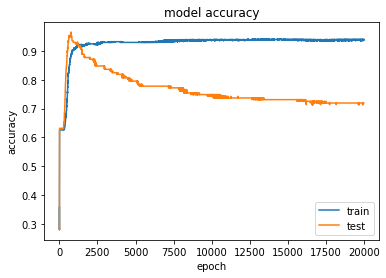

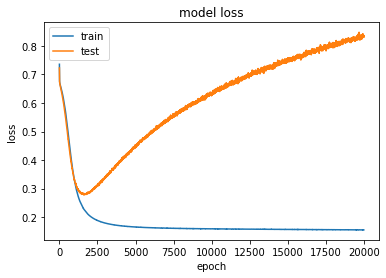

Maximum Loss : 0.7358

Minimum Loss : 0.1551

Loss difference : 0.5808


In [8]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense

# Hyperparameters
training_epochs = 20000 # Total number of training epochs
learning_rate = 0.01 # The learning rate

# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer
    model.add(tf.keras.layers.Dense(12, input_dim=12,activation='sigmoid'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)



print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))